# Problem Statement

A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars (sold in American Market) depends. The company wants to know:

`(i) Which variables are significant in predicting the price of a car<br>
(ii) How well those variables describe the price of a car`

# Business Goal

Model the price of cars with the available independent variables

In [1]:
##Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Importing relevant packages along with machine learning packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE  #(Recursive Feature Elimination)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
##File encoding check
import chardet
import os
my_file = os.path.join(r"C:\Users\Chaitanya\Desktop\UpGrad\3. Machine Learning 1\Linear Regression Assignment\CarPrice_Assignment.csv")
rawdata = open(my_file, 'rb').readline()

my_encoding = chardet.detect(rawdata)
print("File encoding details are as follows:\n",my_encoding)

File encoding details are as follows:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


The default encoding of 'CarPrice_Assignment' file is detected as 'ascii' with 100% confidence level. Hence, we can proceed.

## Step 1: Reading and Understanding the data

In [4]:
##Reading dataset of different types of cars across the Americal market: dataframe 'df_carprice'
file_path = r"C:\Users\Chaitanya\Desktop\UpGrad\3. Machine Learning 1\Linear Regression Assignment\CarPrice_Assignment.csv"
df_carprice = pd.read_csv(file_path, low_memory=False)
df_carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df_carprice.shape

(205, 26)

In [6]:
df_carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df_carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Step 2: Data Cleaning and Manipulation

In [8]:
##Check null values if any(column wise: missing value percentage)
missing_val_cols_prcnt = round(100*df_carprice.isnull().sum()/len(df_carprice.index),2)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

Series([], dtype: float64)

No missing values encountered in the 'df_carprice' dataset.

In [9]:
##Checking and dropping duplicated records(if any)
df_carprice = df_carprice.drop_duplicates()

In [10]:
##Stripping off spaces(if any) and converting the column names to lowercase 
df_carprice.columns = df_carprice.columns.str.strip(' ').str.lower()
df_carprice.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
df_carprice.shape

(205, 26)

In [12]:
##Creating a function to remove single value unique columns from the 'df_carprice' dataframe (if any)
def cols_single_val_remove(df):
    df_1 = df.copy()
    
    unisvcol = (df_1.nunique()==1)
    list_unisvcol = list(unisvcol[unisvcol.values==True].index)
    df_1.drop(list_unisvcol, axis=1, inplace=True)
    return df_1

df_carprice = cols_single_val_remove(df= df_carprice)
df_carprice.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
##Checking if any change in the shape of the dataframe
df_carprice.shape

(205, 26)

In [14]:
df_carprice.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
##Checking variable named CarName (now 'carname') which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
df_carprice.carname.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: carname, dtype: object

In [16]:
##Retaining only the 'car company' (first half) under a new column 'companyname' and dropping off the 'carname' column
df_carprice['companyname'] = df_carprice['carname'].apply(lambda x: x.split(' ')[0])
df_carprice = df_carprice.drop('carname', axis=1)
df_carprice.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
##Converting all the entries of 'companyname' to lower case and checking unique entries of 'companyname'
df_carprice.companyname = df_carprice.companyname.str.lower()
df_carprice.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Making sure that the unique entries are consistent. Fixing spelling mistakes in 'companyname' column<br>
(1) 'maxda' = 'mazda'<br>
(2) 'porcshce'= 'porsche'<br>
(3) 'toyouta' = 'toyota'<br>
(4) 'vokswagen' = 'volkswagen'<br>
(5) 'vw' = 'volkswagen'<br>
(6) 'alfa-romero' = 'alfa-romeo'

In [18]:
##Correcting the irregularities in the names of unique entries of 'companyname'
'''
defining a 'company_name_rep' function to expedite the process of replacement
'a' is the old value, 'b' is the replaced (corrected) value
'''
def company_name_rep(df,a,b):
    return df_carprice.companyname.replace(a,b, inplace=True)

company_name_rep(df_carprice,'maxda','mazda')
company_name_rep(df_carprice,'porcshce','porsche')
company_name_rep(df_carprice,'toyouta','toyota')
company_name_rep(df_carprice,'vokswagen','volkswagen')
company_name_rep(df_carprice,'vw','volkswagen')
company_name_rep(df_carprice,'alfa-romero','alfa-romeo')

print(df_carprice.companyname.unique())
print("\nNumber of unique car companies: ",df_carprice.companyname.nunique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

Number of unique car companies:  22


In [19]:
df_carprice.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
df_carprice.columns

Index(['car_id', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'companyname'],
      dtype='object')

In [21]:
df_carprice.shape

(205, 26)

## Step 3: Visualising the data

<b>Visualising Dependent Variable: 'price'</b>

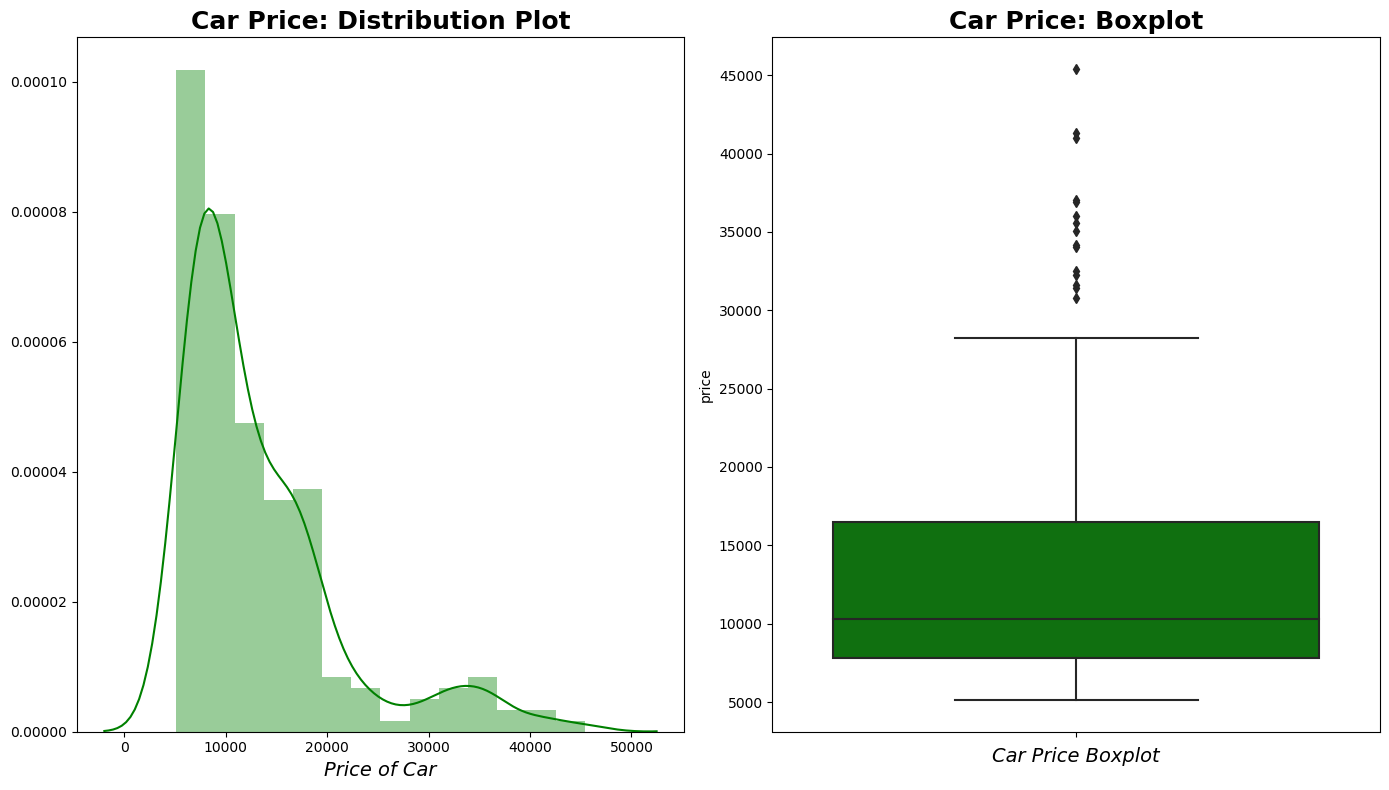

In [22]:
##Visualising our dependent/target variable 'price' data using a distplot and boxplot
plt.figure(figsize=(14,8), dpi=100)

#subplot (121)
plt.subplot(121)
plt.title('Car Price: Distribution Plot', fontweight='bold', fontsize=18)
sns.distplot(df_carprice['price'], color='g')
plt.xlabel('Price of Car', fontstyle='italic', fontsize=14)

#subplot (122)
plt.subplot(122)
plt.title('Car Price: Boxplot', fontweight='bold', fontsize=18)
sns.boxplot(y= df_carprice['price'], color='g')
plt.xlabel('Car Price Boxplot', fontstyle='italic', fontsize=14)

plt.tight_layout()
plt.autoscale()
plt.show()

In [23]:
##Checking car 'price' boxplot percentiles (distribution)
round(df_carprice.price.describe(percentiles = [0.25,0.5,0.75,0.80,0.85,0.90,0.95,0.99,1]))

count      205.0
mean     13277.0
std       7989.0
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
80%      17494.0
85%      18500.0
90%      22563.0
95%      32472.0
99%      40803.0
100%     45400.0
max      45400.0
Name: price, dtype: float64

**Observation:** <br>
(1) The car price distribution plot is right-skewed, meaning that the data set's lower bounds are extremely low relative to the rest of the data. <br>
(2) There is a significant difference between the mean (13,277) and median (10,295) values of the car price distribution, which shows sampling fluctuations in the car prices data.<br>
(3) From the boxplot and percentile details, we see that 50% of the car prices are below (10,295), 75% of the prices are below (16,503), 85% of the prices are below (18,500), 90% of the prices are below (22,563) and remaining 10% are between (22,563 and 45,400)


<b>Step 3.1: Visualising Categorical Variables</b>

In [24]:
df_carprice.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


*Categorical variables include:*<br>
(i) companyname<br>
(ii) symboling<br>
(iii) fueltype<br>
(iv) aspiration<br>
(v) doornumber<br>
(vi) carbody<br>
(vii) drivewheel<br>
(viii) enginelocation<br>
(ix) enginetype<br>
(x) cylindernumber<br>
(xi) fuelsystem<br>

In [25]:
##Defining a function for understanding the unique values and counts of categorical variable columns in 'df_carprice' dataframe
def unique_vals(df, list_1):
    df1 = df.copy()
    for i in list_1:
        print('Unique values of ',i,':',set(df1[i]),'\nNumber of unique items in ',i,':',len(set(df1[i])),'\n')

#List of categorical columns
cat_cols_list= ['companyname','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
unique_vals(df= df_carprice, list_1=cat_cols_list)

Unique values of  companyname : {'honda', 'volkswagen', 'mazda', 'subaru', 'renault', 'volvo', 'jaguar', 'mitsubishi', 'buick', 'audi', 'peugeot', 'isuzu', 'chevrolet', 'dodge', 'plymouth', 'bmw', 'alfa-romeo', 'porsche', 'toyota', 'nissan', 'mercury', 'saab'} 
Number of unique items in  companyname : 22 

Unique values of  symboling : {0, 1, 2, 3, -2, -1} 
Number of unique items in  symboling : 6 

Unique values of  fueltype : {'gas', 'diesel'} 
Number of unique items in  fueltype : 2 

Unique values of  aspiration : {'turbo', 'std'} 
Number of unique items in  aspiration : 2 

Unique values of  doornumber : {'two', 'four'} 
Number of unique items in  doornumber : 2 

Unique values of  carbody : {'hardtop', 'wagon', 'convertible', 'hatchback', 'sedan'} 
Number of unique items in  carbody : 5 

Unique values of  drivewheel : {'4wd', 'rwd', 'fwd'} 
Number of unique items in  drivewheel : 3 

Unique values of  enginelocation : {'front', 'rear'} 
Number of unique items in  enginelocation 

## Univariate and Segmented Univariate Analysis

#### Car Company Analysis

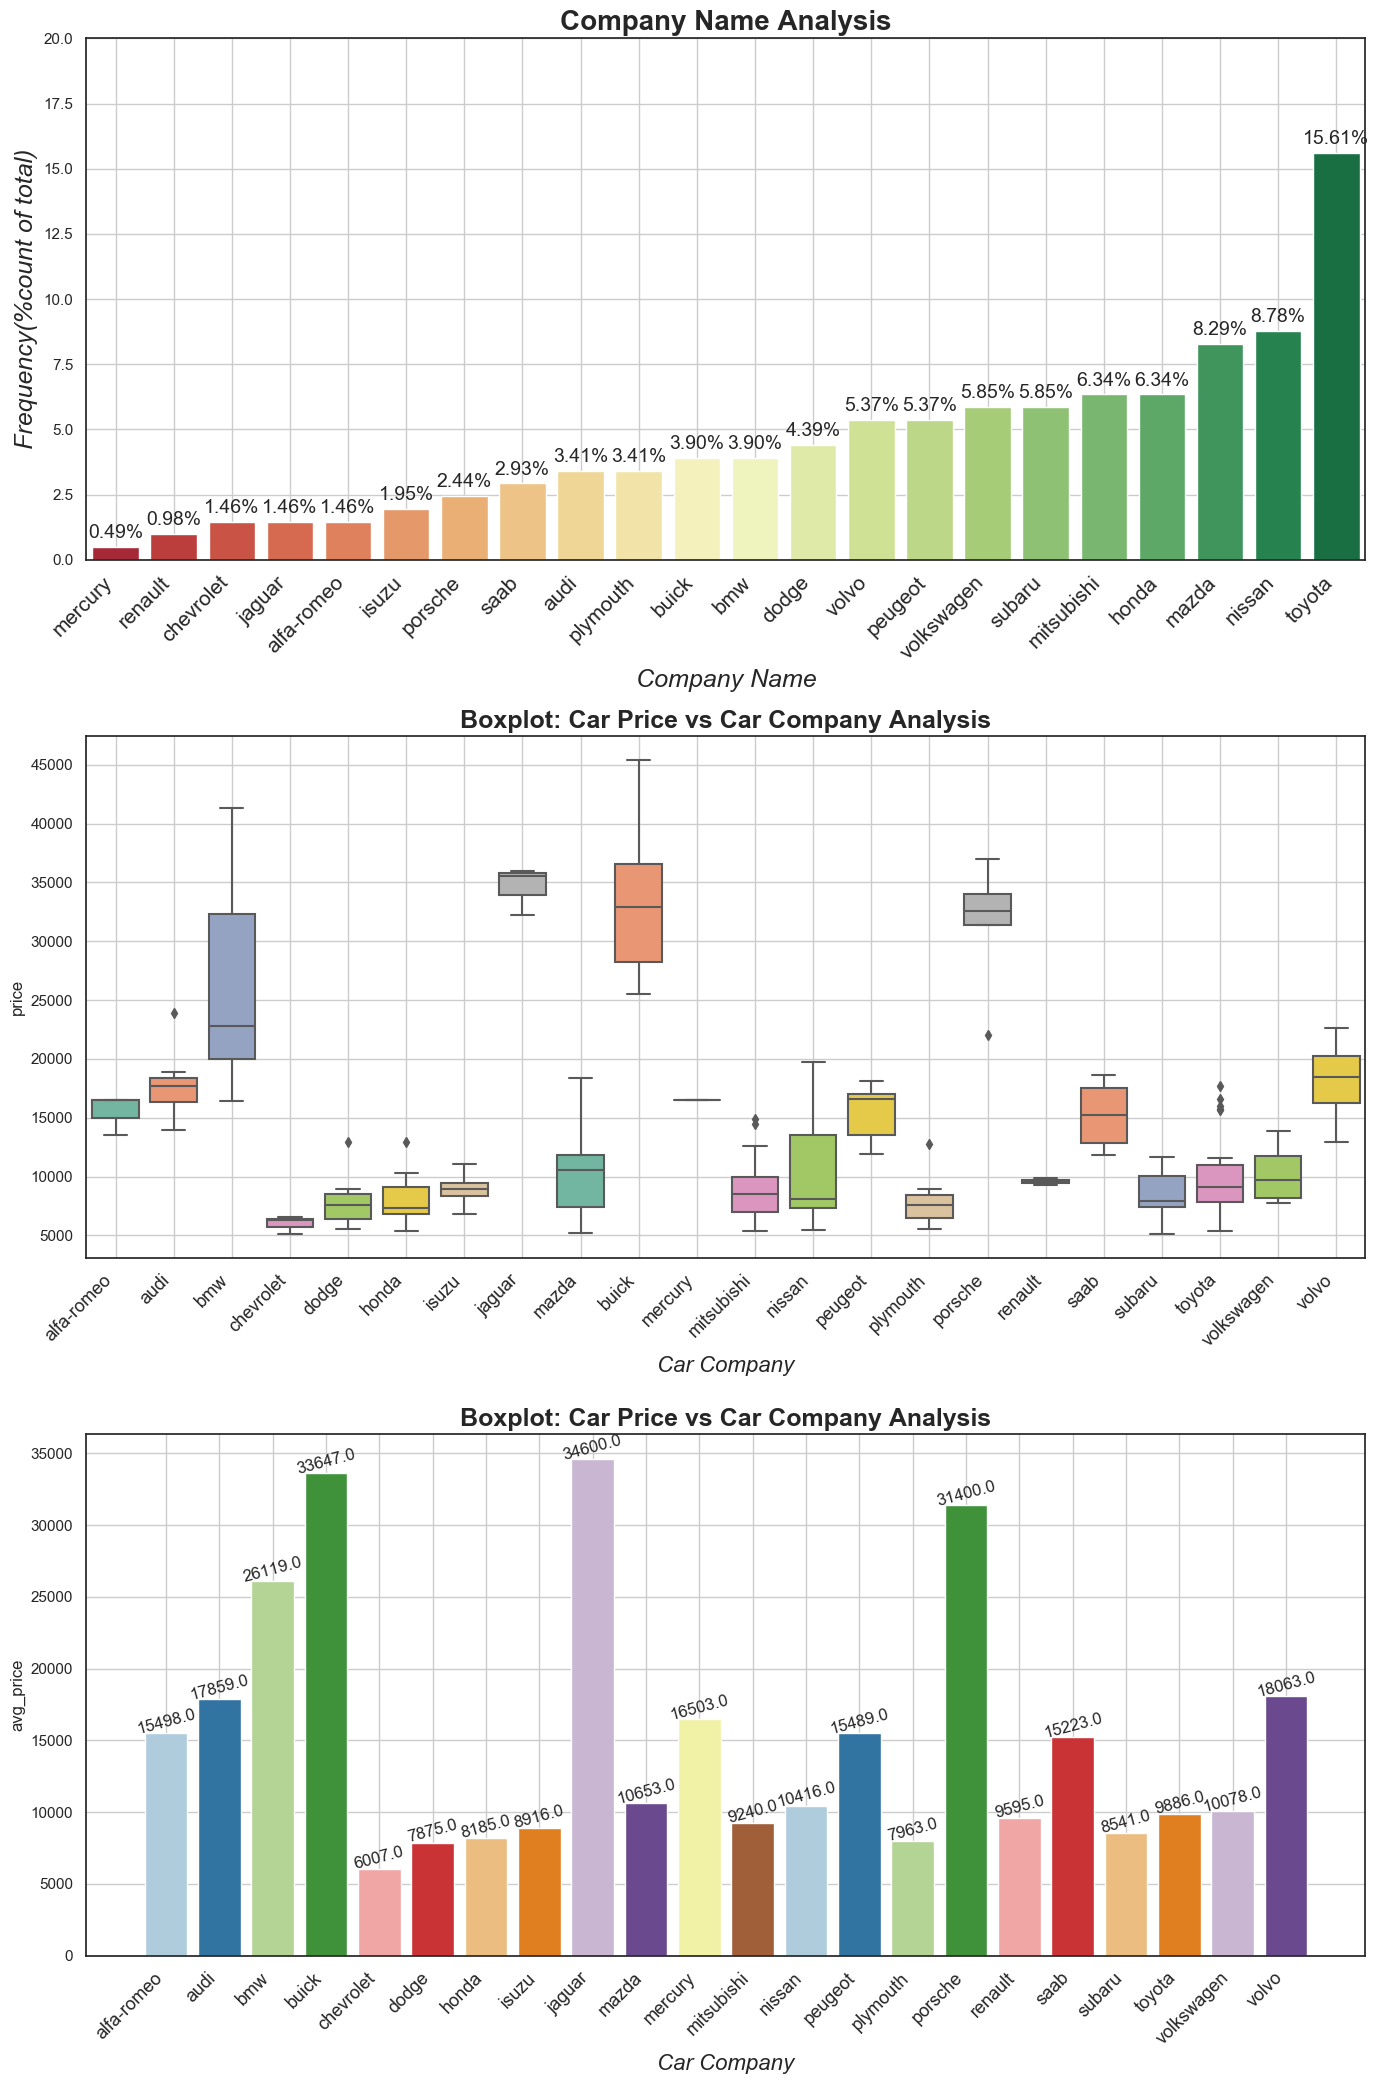

In [26]:
##Checking which car company is favored the most
sns.set(style='white')
plt.figure(figsize=(14, 21), dpi=100)

plt.subplot(311)
cn = pd.DataFrame((df_carprice.companyname.value_counts(normalize=True)*100).round(2).sort_values())
cn.reset_index(inplace=True)
ax_1 = sns.barplot(x='index',y='companyname', data=cn, palette='RdYlGn')

plt.setp(ax_1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Company Name', fontsize= 18, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 18, fontstyle='italic')
plt.title('Company Name Analysis', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15)
plt.ylim(0,20)
plt.grid(True)
for i in ax_1.patches:
    ax_1.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

#Boxplot car company name type and car price
plt.subplot(312)
ax_RN = sns.boxplot(x=df_carprice.companyname, y=df_carprice.price, palette=("Set2"))
plt.title('Boxplot: Car Price vs Car Company Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Car Company', fontsize= 16, fontstyle='italic')
plt.setp(ax_RN.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize=13)
plt.grid(True)

#Barplot Average Price based on car company name
plt.subplot(313)
avg1 = pd.DataFrame(df_carprice.groupby('companyname')['price'].mean().round().to_frame('avg_price'))
avg1.reset_index(inplace=True)
ax_12 = sns.barplot(x='companyname',y='avg_price', data=avg1, palette= 'Paired')
plt.title('Boxplot: Car Price vs Car Company Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Car Company', fontsize= 16, fontstyle='italic')
plt.setp(ax_12.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize=13)
ax_12.set(ylim=(0, 40000))
for i in ax_12.patches:
    ax_12.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0,8), textcoords = 'offset points', fontsize=12, rotation=15)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:** `Toyota` is the most preferred car company, followed by `Nissan`. Car companies viz. `Jaguar` and `Buick` have the highest average car prices i.e (34,600) and (33,647) respectively.

#### Carbody Type Analysis

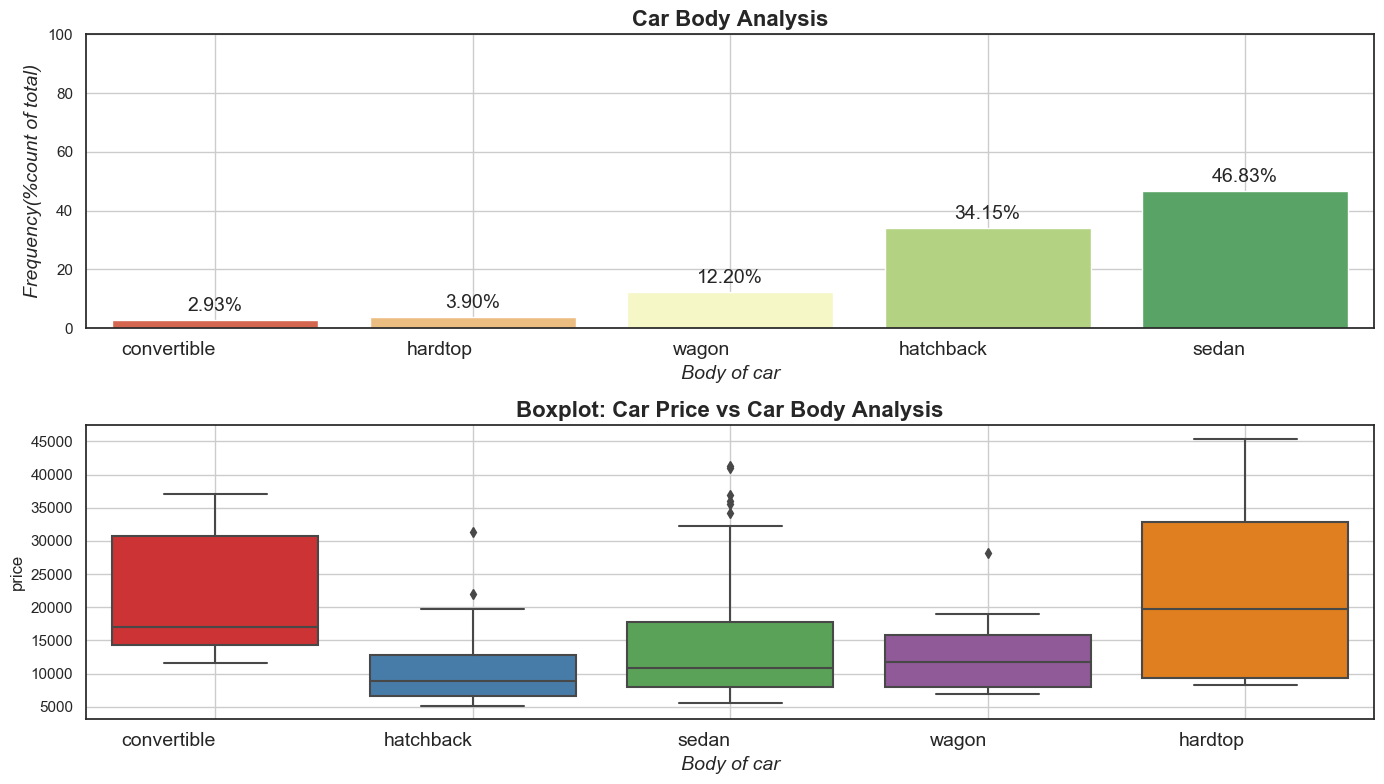

In [27]:
##carbody type analysis and boxplot
sns.set(style='white')
plt.figure(figsize=(14,8), dpi=100)

plt.subplot(211)
dc = pd.DataFrame((df_carprice.carbody.value_counts(normalize=True)*100).round(2).sort_values())
dc.reset_index(inplace=True)
ax_00 = sns.barplot(x='index',y='carbody', data=dc, palette='RdYlGn')

plt.setp(ax_00.get_xticklabels(), horizontalalignment='right')
plt.xlabel('Body of car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
plt.title('Car Body Analysis', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.ylim(0,100)
plt.grid(True)
for i in ax_00.patches:
    ax_00.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

#Boxplot carbody type and car price
plt.subplot(212)
ax_NR = sns.boxplot(x=df_carprice.carbody, y=df_carprice.price, palette=("Set1"))
plt.title('Boxplot: Car Price vs Car Body Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Body of car', fontsize= 14, fontstyle='italic')
plt.setp(ax_NR.get_xticklabels(), horizontalalignment='right')
plt.xticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:**<br>
(i) `Sedan` is the top carbody type preferred(with 46.83% of total number of cars being sedan type), followed by `hatchback`.<br>
(ii) `Convertible` and `hardtop` body type cars have a comparatively higher priced models in comparison to other carbody type models, though there are some exceptions belonging to sedan, hatchback and wagon carbody type.

#### Fuel Type Analysis

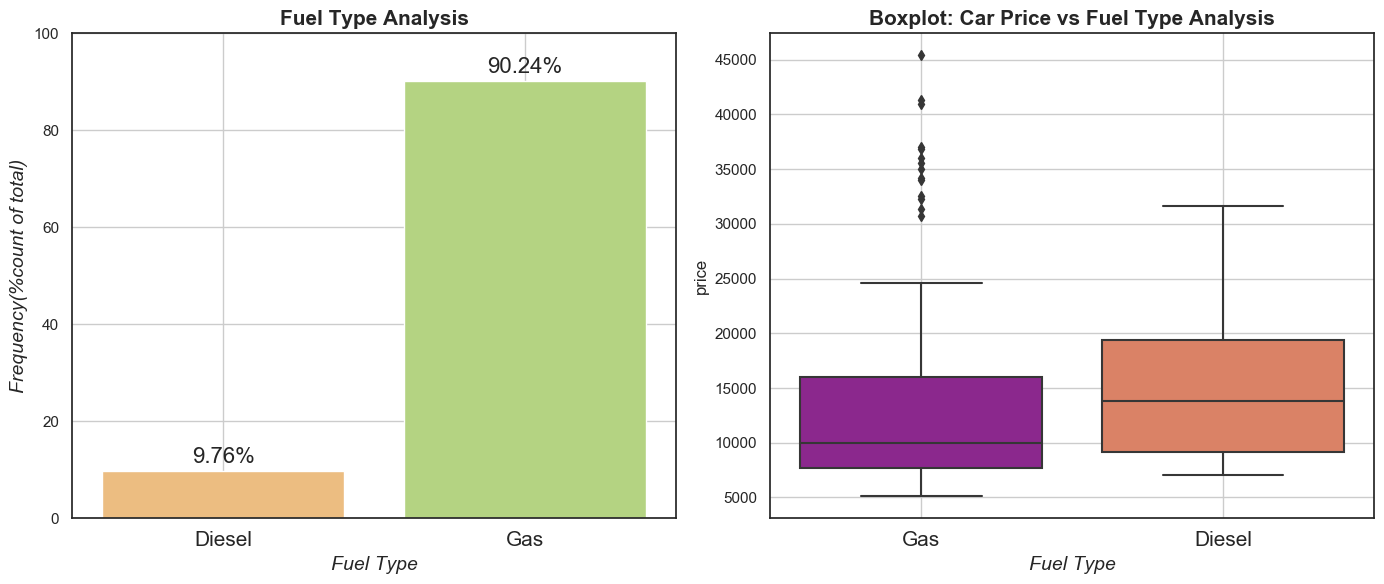

In [28]:
##Checking which fuel type car is preferred the most
sns.set(style='white')
plt.figure(figsize=(14,6), dpi=100)

plt.subplot(121)
ab = pd.DataFrame((df_carprice.fueltype.value_counts(normalize=True)*100).round(2).sort_values())
ab.reset_index(inplace=True)
ax_2 = sns.barplot(x='index',y='fueltype', data=ab, palette='RdYlGn')
ax_2.set_xticklabels(labels=['Diesel','Gas'], rotation='horizontal', fontsize=15)
plt.xlabel('Fuel Type', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
plt.title('Fuel Type Analysis', fontsize=15, fontweight='bold')
plt.ylim(0,100)
plt.grid(True)
for i in ax_2.patches:
    ax_2.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=16)

#Boxplot fuel type and price
plt.subplot(122)
ax_ff= sns.boxplot(x=df_carprice.fueltype, y=df_carprice.price, palette=("plasma"))
ax_ff.set_xticklabels(labels=['Gas','Diesel'], fontsize=15)
plt.title('Boxplot: Car Price vs Fuel Type Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Fuel Type', fontsize= 14, fontstyle='italic')

plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

In [29]:
##Checking for median prices based on fuel type of cars (since, some outliers do exist in the prices of 'gas' fuel type cars)
print('Median Price of Gas fuel type cars:',df_carprice[df_carprice.fueltype=='gas'].price.median())
print('Median Price of Diesel fuel type cars:',df_carprice[df_carprice.fueltype=='diesel'].price.median())

Median Price of Gas fuel type cars: 9989.0
Median Price of Diesel fuel type cars: 13852.5


**Observations:** <br>(i) Number of `gas` fueled cars are more than `diesel` fuel type cars; which amounts to approximately `90%` of the car price records.<br>
(ii)The `diesel` fuel type cars have a higher median price(13,852.5) in comparison to that of the `gas` fuel type cars(9,989).

#### Aspiration, Door Number, Engine Location and Drivewheel Analysis

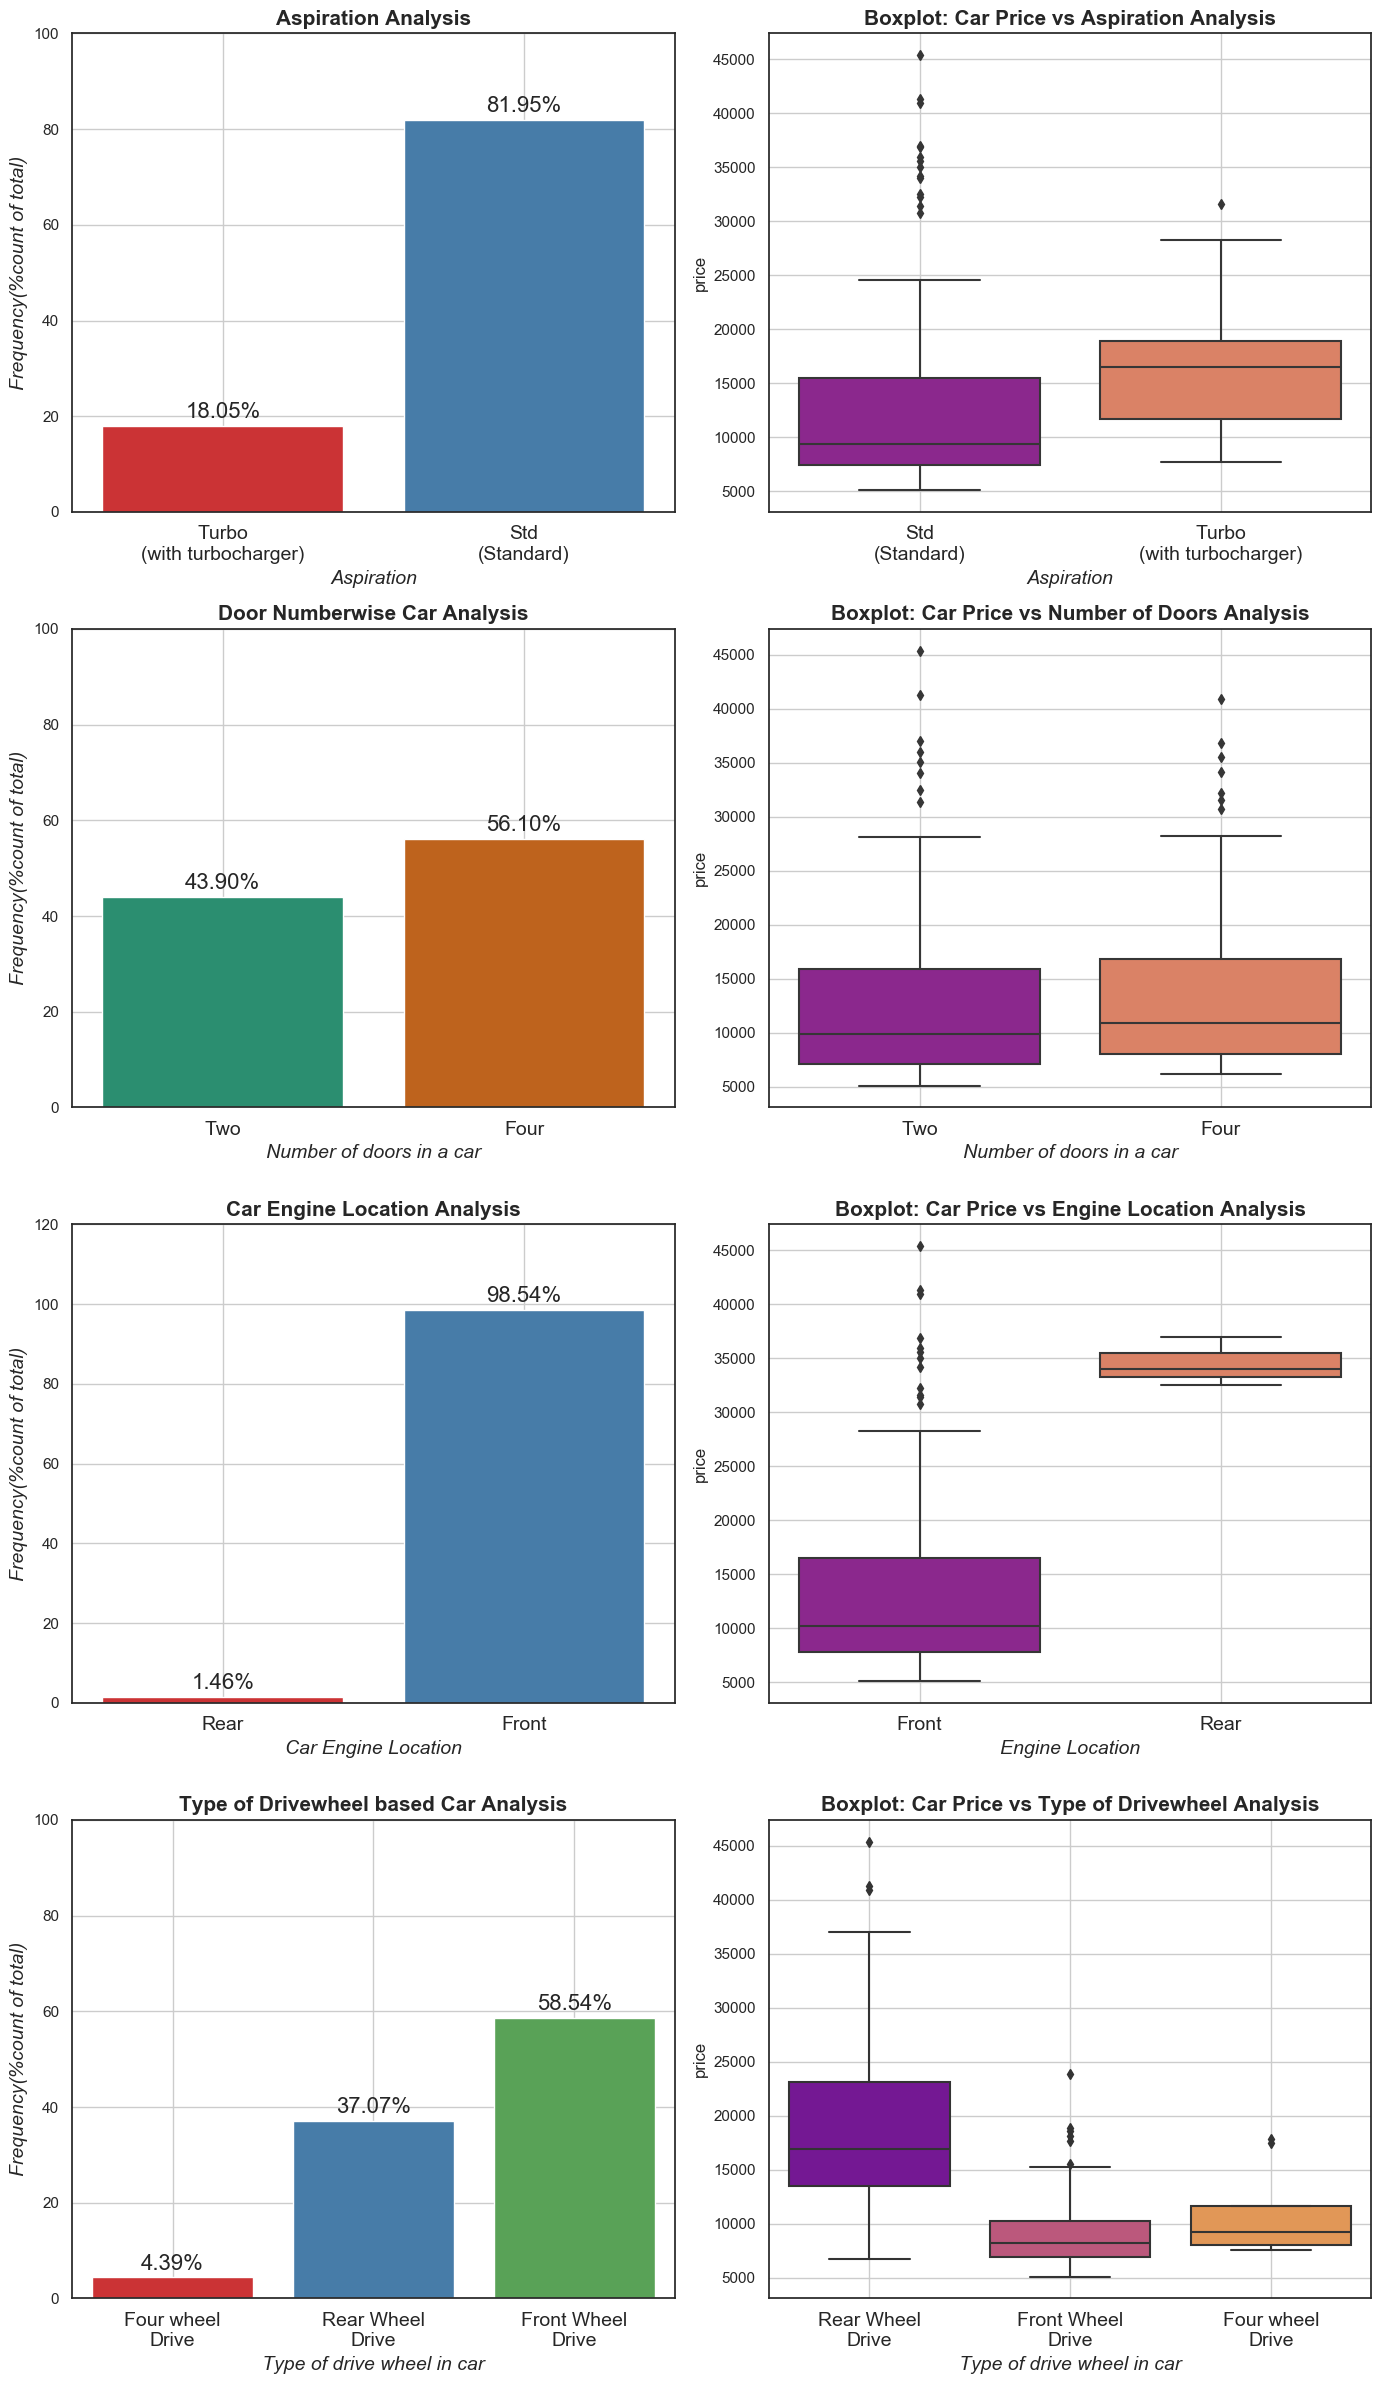

In [30]:
##Checking which aspiration is preferred the most
sns.set(style='white')
plt.figure(figsize=(14,24), dpi=100)

#subplot (421):Aspiration Analysis
plt.subplot(421)
bc = pd.DataFrame((df_carprice.aspiration.value_counts(normalize=True)*100).round(2).sort_values())
bc.reset_index(inplace=True)
ax_3 = sns.barplot(x='index',y='aspiration', data=bc, palette='Set1')
ax_3.set_xticklabels(labels=['Turbo\n(with turbocharger)','Std\n(Standard)'], rotation='horizontal', fontsize=14)
plt.xlabel('Aspiration', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
plt.title('Aspiration Analysis', fontsize=15, fontweight='bold')
plt.ylim(0,100)
plt.grid(True)
for i in ax_3.patches:
    ax_3.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=16)

#subplot(422): Boxplot aspiration and car price
plt.subplot(422)
ax_gg= sns.boxplot(x=df_carprice.aspiration, y=df_carprice.price, palette=("plasma"))
ax_gg.set_xticklabels(labels=['Std\n(Standard)','Turbo\n(with turbocharger)'], rotation='horizontal', fontsize=14)
plt.title('Boxplot: Car Price vs Aspiration Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Aspiration', fontsize= 14, fontstyle='italic')
plt.grid(True)

##Checking which car is preferred the most, based on number of doors
#subplot (423):Door Numberwise Car Analysis
plt.subplot(423)
cd = pd.DataFrame((df_carprice.doornumber.value_counts(normalize=True)*100).round(2).sort_values())
cd.reset_index(inplace=True)
ax_4 = sns.barplot(x='index',y='doornumber', data=cd, palette='Dark2')
ax_4.set_xticklabels(labels=['Two','Four'], rotation='horizontal', fontsize=14)
plt.xlabel('Number of doors in a car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
plt.title('Door Numberwise Car Analysis', fontsize=15, fontweight='bold')
plt.ylim(0,100)
plt.grid(True)
for i in ax_4.patches:
    ax_4.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=16)

#subplot(424): Boxplot number of doors and car price
plt.subplot(424)
ax_hh= sns.boxplot(x=df_carprice.doornumber, y=df_carprice.price, palette=("plasma"))
ax_hh.set_xticklabels(labels=['Two','Four'], rotation='horizontal', fontsize=14)
plt.title('Boxplot: Car Price vs Number of Doors Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Number of doors in a car', fontsize= 14, fontstyle='italic')
plt.grid(True)

##Checking which car is preferred the most, based on enginelocation
#subplot  (425):Car Engine Location Analysis
plt.subplot(425)
ef = pd.DataFrame((df_carprice.enginelocation.value_counts(normalize=True)*100).round(2).sort_values())
ef.reset_index(inplace=True)
ax_5 = sns.barplot(x='index',y='enginelocation', data=ef, palette='Set1')
ax_5.set_xticklabels(labels=['Rear','Front'], rotation='horizontal', fontsize=14)
plt.xlabel('Car Engine Location', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
plt.title('Car Engine Location Analysis', fontsize=15, fontweight='bold')
plt.ylim(0,120)
plt.grid(True)
for i in ax_5.patches:
    ax_5.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=16)

#subplot(426): Boxplot engine location and car price
plt.subplot(426)
ax_jj= sns.boxplot(x=df_carprice.enginelocation, y=df_carprice.price, palette=("plasma"))
ax_jj.set_xticklabels(labels=['Front','Rear'], rotation='horizontal', fontsize=14)
plt.title('Boxplot: Car Price vs Engine Location Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Engine Location', fontsize= 14, fontstyle='italic')
plt.grid(True)

##Checking which car is preferred the most, based on drivewheel
#subplot  (427):Type of Drivewheel based Car Analysis
plt.subplot(427)
gh = pd.DataFrame((df_carprice.drivewheel.value_counts(normalize=True)*100).round(2).sort_values())
gh.reset_index(inplace=True)
ax_6 = sns.barplot(x='index',y='drivewheel', data=gh, palette='Set1')
ax_6.set_xticklabels(labels=['Four wheel\nDrive','Rear Wheel\nDrive','Front Wheel\nDrive'], rotation='horizontal', fontsize=14)
plt.xlabel('Type of drive wheel in car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
plt.title('Type of Drivewheel based Car Analysis', fontsize=15, fontweight='bold')
plt.ylim(0,100)
plt.grid(True)
for i in ax_6.patches:
    ax_6.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=16)

#subplot(428): Boxplot number of doors and car price
plt.subplot(428)
ax_pp= sns.boxplot(x=df_carprice.drivewheel, y=df_carprice.price, palette=("plasma"))
ax_pp.set_xticklabels(labels=['Rear Wheel\nDrive','Front Wheel\nDrive','Four wheel\nDrive'], rotation='horizontal', fontsize=14)
plt.title('Boxplot: Car Price vs Type of Drivewheel Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Type of drive wheel in car', fontsize= 14, fontstyle='italic')
plt.grid(True)


plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

In [31]:
##Checking car price vs aspiration boxplot details
print('For std:',df_carprice[df_carprice.aspiration=='std'].price.describe())
print('\nFor turbo:',df_carprice[df_carprice.aspiration=='turbo'].price.describe())

For std: count      168.000000
mean     12611.270833
std       8214.342183
min       5118.000000
25%       7446.000000
50%       9418.000000
75%      15527.500000
max      45400.000000
Name: price, dtype: float64

For turbo: count       37.000000
mean     16298.166676
std       6098.889385
min       7689.000000
25%      11694.000000
50%      16503.000000
75%      18950.000000
max      31600.000000
Name: price, dtype: float64


**Observations:**<br>(i) Most of the cars have `'std'(standard) type aspiration` (around 81.95%). <br>(ii) The standard type and turbo type have around 50% of the car models below 9,418 and 16,503 respectively. Thus, making most of the `std` type `less expensive` though there are some exceptions seen.

In [32]:
##Checking car price vs number of doors in car: boxplot details
print('For two:\n',df_carprice[df_carprice.doornumber=='two'].price.describe())
print('\nFor four:\n',df_carprice[df_carprice.doornumber=='four'].price.describe())

For two:
 count       90.000000
mean     12989.924078
std       8784.227805
min       5118.000000
25%       7171.500000
50%       9927.000000
75%      15909.750000
max      45400.000000
Name: price, dtype: float64

For four:
 count      115.000000
mean     13501.152174
std       7338.296321
min       6229.000000
25%       8006.000000
50%      10898.000000
75%      16872.500000
max      40960.000000
Name: price, dtype: float64


**Observations:**<br>(i) Around 56.1% car models have `four doors`. <br>
(ii) With respect to the car pricing, there is no significant difference in the price range. The doornumber variable associated with the car is not affecting the price much.

In [33]:
##Checking car price vs car engine location: boxplot details
print('For rear:\n',df_carprice[df_carprice.enginelocation=='rear'].price.describe())
print('\nFor front:\n',df_carprice[df_carprice.enginelocation=='front'].price.describe())

For rear:
 count        3.000000
mean     34528.000000
std       2291.287847
min      32528.000000
25%      33278.000000
50%      34028.000000
75%      35528.000000
max      37028.000000
Name: price, dtype: float64

For front:
 count      202.000000
mean     12961.097361
std       7607.984118
min       5118.000000
25%       7778.250000
50%      10221.500000
75%      16482.500000
max      45400.000000
Name: price, dtype: float64


**Observations:**<br>(i) Around 98.54% car models have engine at the `front`. <br>
(ii) The `rear engine` cars are `expensive` in comparison to the front engine type cars. <br>(The median prices of rear and front engine types are 34,028 and 10,221 respectively.)

In [34]:
print('For rear wheel drive:\n',df_carprice[df_carprice.drivewheel=='rwd'].price.describe())
print('\nFor front wheel drive:\n',df_carprice[df_carprice.drivewheel=='fwd'].price.describe())
print('\nFor four wheel drive:\n',df_carprice[df_carprice.drivewheel=='4wd'].price.describe())

For rear wheel drive:
 count       76.000000
mean     19910.809211
std       9120.137883
min       6785.000000
25%      13475.000000
50%      16912.500000
75%      23110.000000
max      45400.000000
Name: price, dtype: float64

For front wheel drive:
 count      120.000000
mean      9239.308333
std       3317.930730
min       5118.000000
25%       6976.250000
50%       8222.000000
75%      10307.500000
max      23875.000000
Name: price, dtype: float64

For four wheel drive:
 count        9.000000
mean     11087.463000
std       3988.644756
min       7603.000000
25%       8013.000000
50%       9233.000000
75%      11694.000000
max      17859.167000
Name: price, dtype: float64


**Observations:** <br>(i) Most of the cars are `front wheel drive`(58.54% of total cars), followed by `rear wheel drive`(37.07%).<br>
(ii)The boxplot shows that `most of the rear wheel drive` cars are `expensive` in comparison to the front wheel and four wheel drive respectively.  Most highend cars belong to the `rear wheel drive` category

#### Number of Cylinders, Fuel System Type and Engine Type Analysis

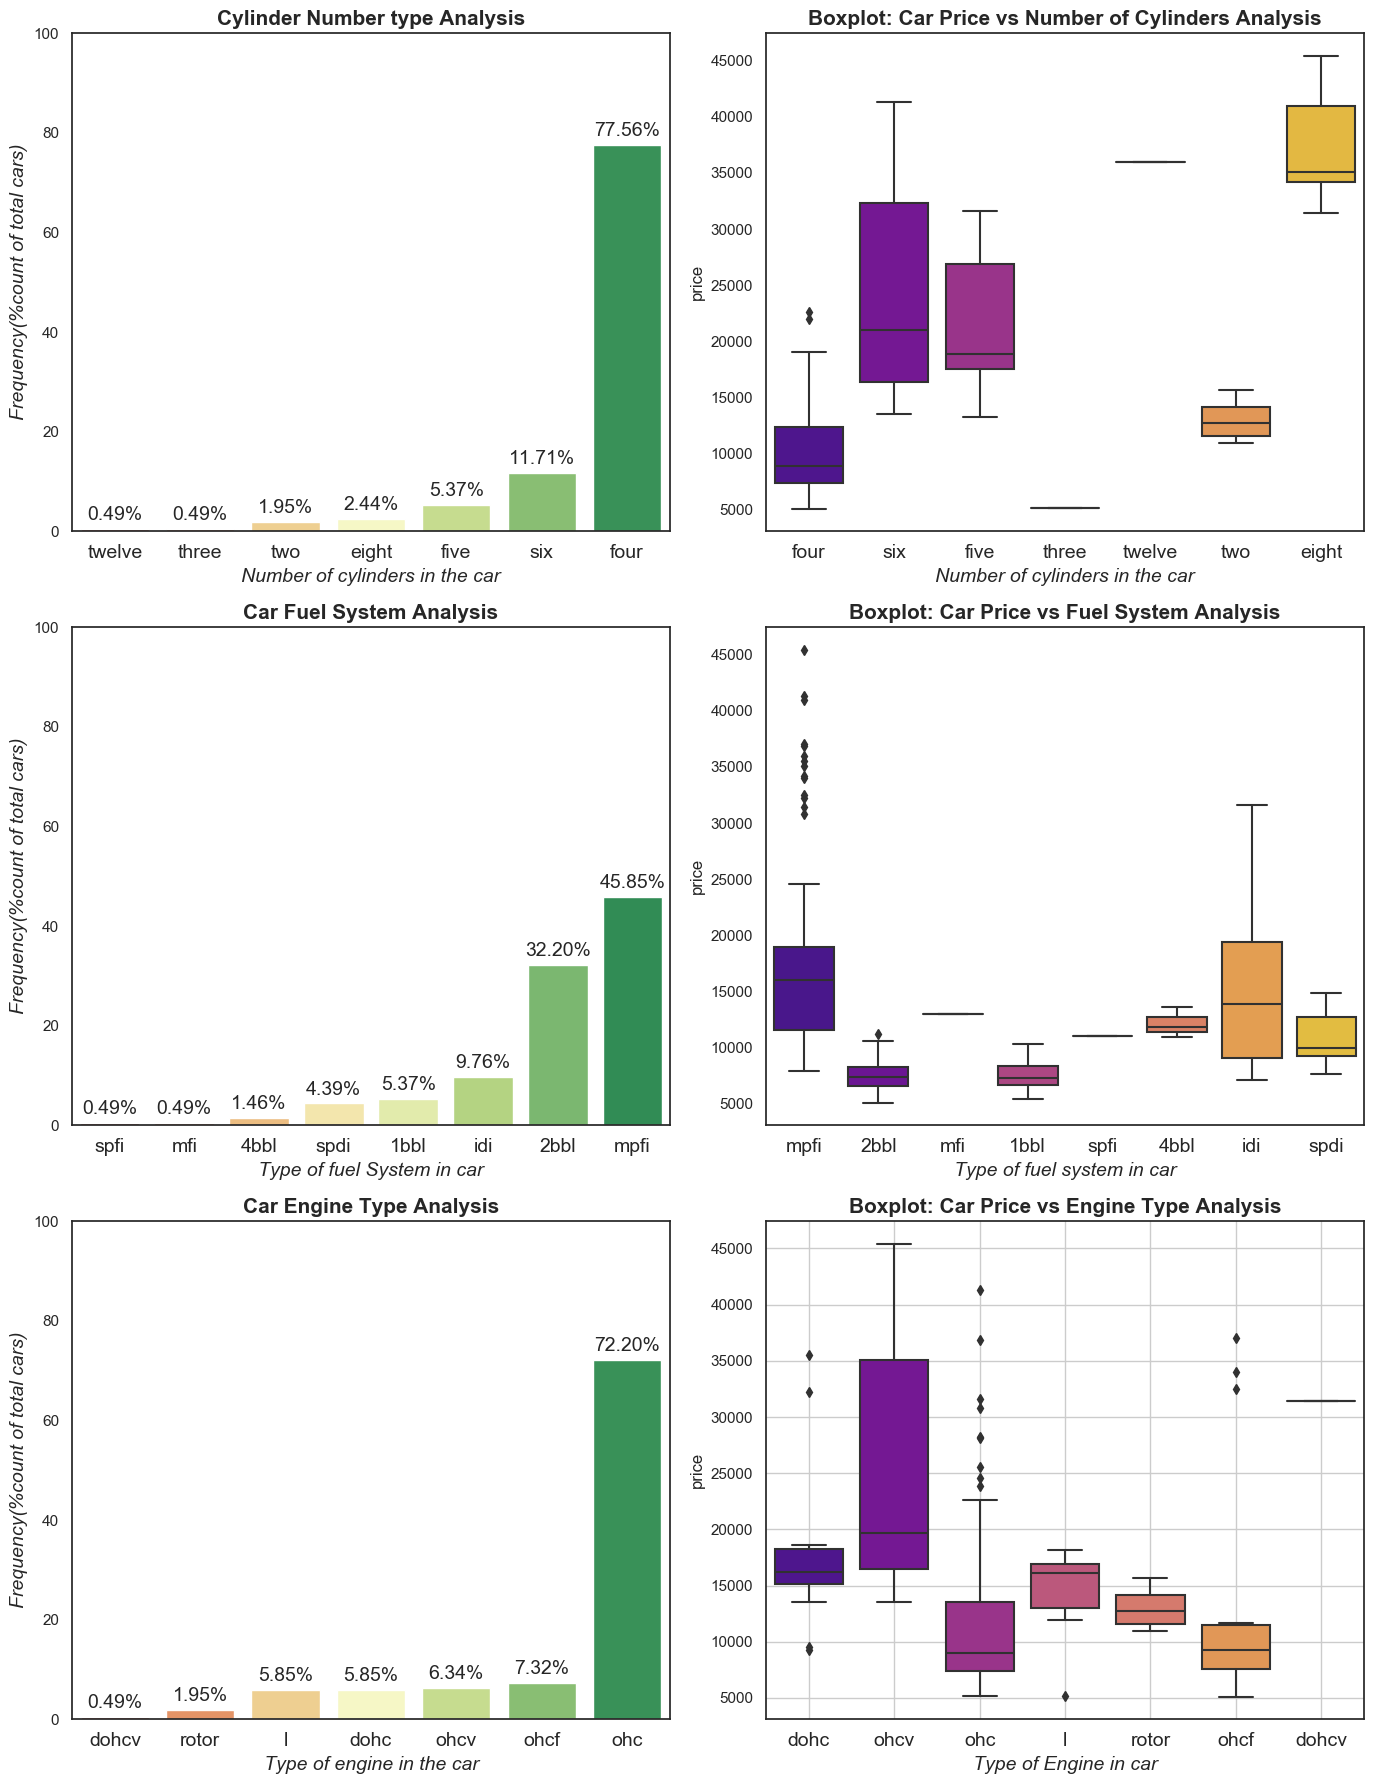

In [35]:
##Checking which cylindernumber type car is preferred the most
sns.set(style='white')
plt.figure(figsize=(14,18), dpi=100)

#subplot (321):Cylinder Number type Analysis
plt.subplot(321)
cy = pd.DataFrame((df_carprice.cylindernumber.value_counts(normalize=True)*100).round(2).sort_values())
cy.reset_index(inplace=True)
ax_7 = sns.barplot(x='index',y='cylindernumber', data=cy, palette='RdYlGn')
plt.xlabel('Number of cylinders in the car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total cars)', fontsize= 14, fontstyle='italic')
plt.title('Cylinder Number type Analysis', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.ylim(0,100)
for i in ax_7.patches:
    ax_7.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

#subplot(322): Boxplot: number of cylinders and car price
plt.subplot(322)
ax_cy= sns.boxplot(x=df_carprice.cylindernumber, y=df_carprice.price, palette=("plasma"))
plt.title('Boxplot: Car Price vs Number of Cylinders Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Number of cylinders in the car', fontsize= 14, fontstyle='italic')
plt.xticks(fontsize=14)

##Checking which car is preferred the most, based on fuel system
#subplot (323):Car Fuel System Analysis
plt.subplot(323)
fs = pd.DataFrame((df_carprice.fuelsystem.value_counts(normalize=True)*100).round(2).sort_values())
fs.reset_index(inplace=True)
ax_8 = sns.barplot(x='index',y='fuelsystem', data=fs, palette='RdYlGn')
plt.xlabel('Type of fuel System in car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total cars)', fontsize= 14, fontstyle='italic')
plt.title('Car Fuel System Analysis', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.ylim(0,100)
for i in ax_8.patches:
    ax_8.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

#subplot(324): Boxplot: Car Fuel system and car price
plt.subplot(324)
ax_mm= sns.boxplot(x=df_carprice.fuelsystem, y=df_carprice.price, palette=("plasma"))
plt.title('Boxplot: Car Price vs Fuel System Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Type of fuel system in car', fontsize= 14, fontstyle='italic')
plt.xticks(fontsize=14)

##Checking which car is preferred the most, based on engine type
#subplot (325):Car Fuel System Analysis
plt.subplot(325)
et = pd.DataFrame((df_carprice.enginetype.value_counts(normalize=True)*100).round(2).sort_values())
et.reset_index(inplace=True)
ax_88 = sns.barplot(x='index',y='enginetype', data=et, palette='RdYlGn')
plt.xlabel('Type of engine in the car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total cars)', fontsize= 14, fontstyle='italic')
plt.title('Car Engine Type Analysis', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.ylim(0,100)
for i in ax_88.patches:
    ax_88.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

#subplot(326): Boxplot: Car Engine Type and car price
plt.subplot(326)
ax_mmm = sns.boxplot(x=df_carprice.enginetype, y=df_carprice.price, palette=("plasma"))
plt.title('Boxplot: Car Price vs Engine Type Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Type of Engine in car', fontsize= 14, fontstyle='italic')
plt.xticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:**<br>
(1) Highest (almost 77.56%)number of the cars have `four cyclinders`, followed by `six cylinders` and `five cylinders` type respectively. Most of the premium/highend price range cars have `eight` and `twelve`cylinders (narrow price range seen for the latter type).<br>
(2) The top two type of `fuel systems` used in cars are `mpfi` (45.85%) and `2bbl` (32.2%) respectively. `mpfi` and `idi` fuel system cars have the highest price range, as per the boxplot.<br>
(3) `ohc` type seems to be the most favored type (72.2%) of engine. Most of the economic budget cars have `ohc` and `ohcf` engine type in them and most of the premium/highend cars prefer `ohcv` engine type.

#### Symboling (Assigned Insurance Rating) Analysis

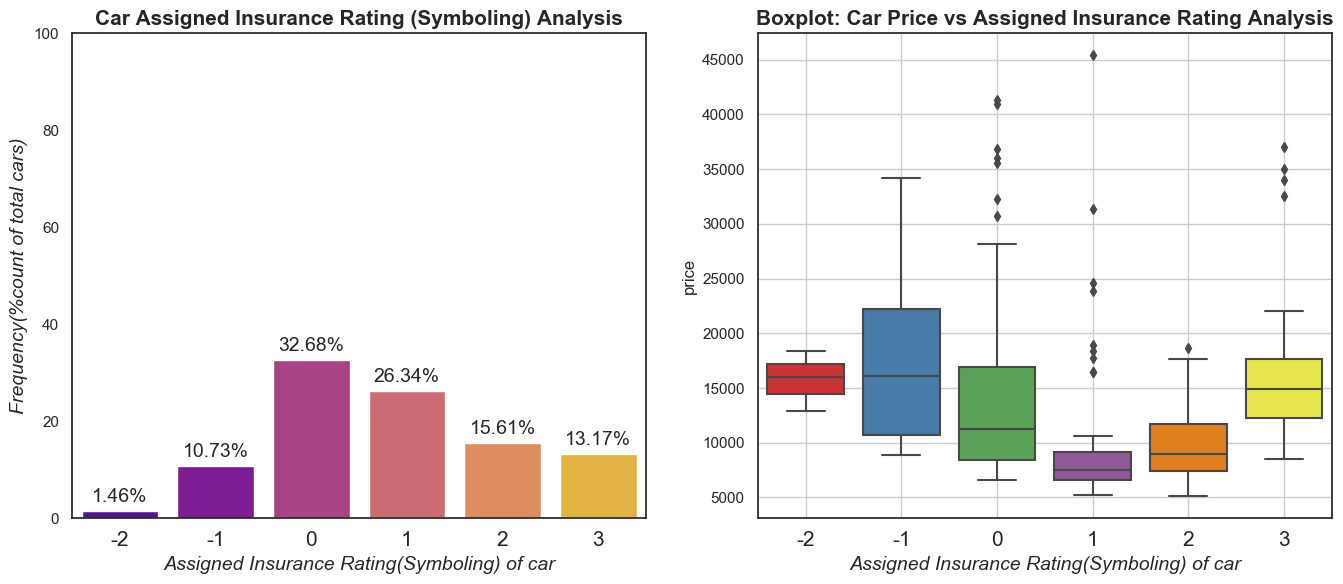

In [36]:
##Assigned insurance rating (symboling) of car analysis
sns.set(style='white')
plt.figure(figsize=(14,6), dpi=100)

plt.subplot(121)
sy = pd.DataFrame((df_carprice.symboling.value_counts(normalize=True)*100).round(2).sort_values())
sy.reset_index(inplace=True)
ax_9 = sns.barplot(x='index',y='symboling', data=sy, palette='plasma')
plt.xticks(fontsize=15)
plt.xlabel('Assigned Insurance Rating(Symboling) of car', fontsize= 14, fontstyle='italic')
plt.ylabel('Frequency(%count of total cars)', fontsize= 14, fontstyle='italic')
plt.title('Car Assigned Insurance Rating (Symboling) Analysis', fontsize=15, fontweight='bold')
plt.ylim(0,100)
for i in ax_9.patches:
    ax_9.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

#Boxplot: Assigned insurance rating (symboling) and car price
plt.subplot(122)
ax_ss= sns.boxplot(x=df_carprice.symboling, y=df_carprice.price, palette=("Set1"))
plt.xticks(fontsize=15)
plt.title('Boxplot: Car Price vs Assigned Insurance Rating Analysis', fontsize=15, fontweight='bold')
plt.xlabel('Assigned Insurance Rating(Symboling) of car', fontsize= 14, fontstyle='italic')

plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

Symboling: It is an assigned insurance risk rating. A value of +3 indicates that the automobile/car is risky, -3 that it is probably pretty safe.

**Observations:**<br>
(i) The top three type of assigned insurance rating to cars are `"0"`(32.68%),`"1"`(26.34%) and `"2"`(15.61%) respectively. Meaning most of the cars sold belong between `neutral` and `moderate-risk zone`.<br>
(ii) The car models with -1 symboling are high priced (insurance risk rating -1, is quite good ). The pricing of symboling +3 category almost resembles to -2 type insurance rating. A dip in car price spread is seen for most of the cars belonging to category +1 insurance rating.

In [37]:
#Converting 'symboling' column to an object dtype categorical variable, as the numeric values imply weight

def replace_num(i,j):
    return df_carprice['symboling'].replace(i,j,inplace=True)

replace_num(3,'high_risk')
replace_num(2,'moderate_risk')
replace_num(1,'low_risk')
replace_num(0,'neutral')
replace_num(-1,'moderate_safe')
replace_num(-2,'very_safe')

print(df_carprice.symboling.unique())
print("dtype: ",df_carprice.symboling.dtype)

['high_risk' 'low_risk' 'moderate_risk' 'neutral' 'moderate_safe'
 'very_safe']
dtype:  object


<b>Step 3.2: Visualising Continuous Variables (Numeric Data)</b>

In [38]:
##Numeric Variables
df_carprice_numeric = pd.DataFrame(df_carprice.dtypes.loc[~(df_carprice.dtypes=='object')])
df_carprice_numeric.reset_index(inplace=True)
df_carprice_numeric= df_carprice_numeric.rename(columns={'index':'numeric_cols'})
df_carprice_numeric.numeric_cols.unique()

array(['car_id', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

We can exclude 'uniqueID' from the series of continuous variables for our data analysis.<br>
*Continuous variables include:*
'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price'


In [39]:
##Retaining only the numberic/continuous variables of our use
cont_cols_list = ['wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'enginesize', 'boreratio', \
                        'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']
df_carprice_cont = df_carprice.loc[:,cont_cols_list]

#Dataframe containing only the continuous variables
df_carprice_cont.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
##Let's define a function to draw scatterplots to understand relationship between 'dependent' and 'numeric/continuous' variables.
#(For three scatterplots together)
def scatter_plt_3(a, b, c):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    plt.subplot(1,3,1)
    plt.scatter(x= df_carprice[a], y= df_carprice['price'])
    plt.title(("car price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('Price', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (132)
    plt.subplot(1,3,2)
    plt.scatter(x= df_carprice[b], y= df_carprice['price'])
    plt.title(("car price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('Price', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    plt.subplot(1,3,3)
    plt.scatter(x= df_carprice[c], y= df_carprice['price'])
    plt.title(("car price vs "+c), fontweight='bold', fontsize=15)
    plt.xlabel(c, fontsize=13, fontstyle='italic')
    plt.ylabel('Price', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()
    
##(For two scatterplots together)
def scatter_plt_2(a,b):
    sns.set_style("white")
    plt.figure(figsize=(10,5), dpi=120)
    #subplot(121)
    plt.subplot(121)
    plt.scatter(x= df_carprice[a], y= df_carprice['price'])
    plt.title(("car price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('Price', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot(122)
    plt.subplot(122)
    plt.scatter(x= df_carprice[b], y= df_carprice['price'])
    plt.title(("car price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('Price', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

### Scatterplots (Car Price vs Numeric Variables) Analysis

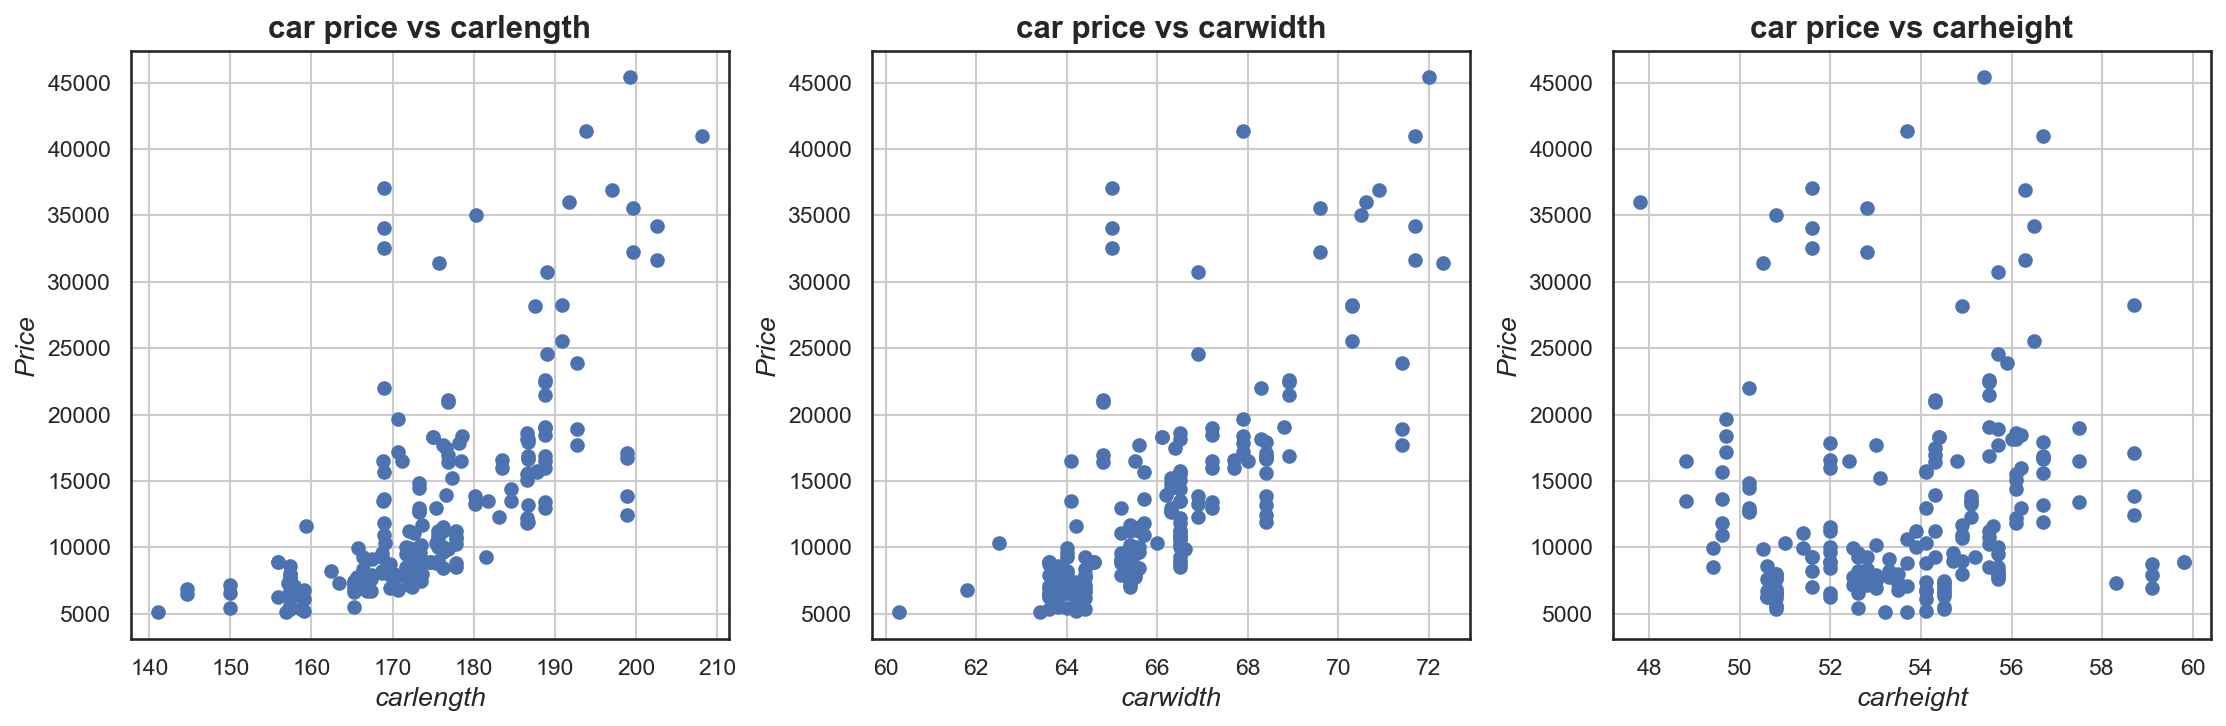

In [41]:
##Scatter plots 'dependent variable' vs 'numeric/continuous' variables. Using defined function 'scatter_plt' for scatterplots
scatter_plt_3('carlength', 'carwidth','carheight')

**Observations:**<br>
(i)`carlength`and `carwidth` seems to have a positive correlation with the car `price`.<br>
(ii)`carheight` seems have little to no correlation with car `price`.

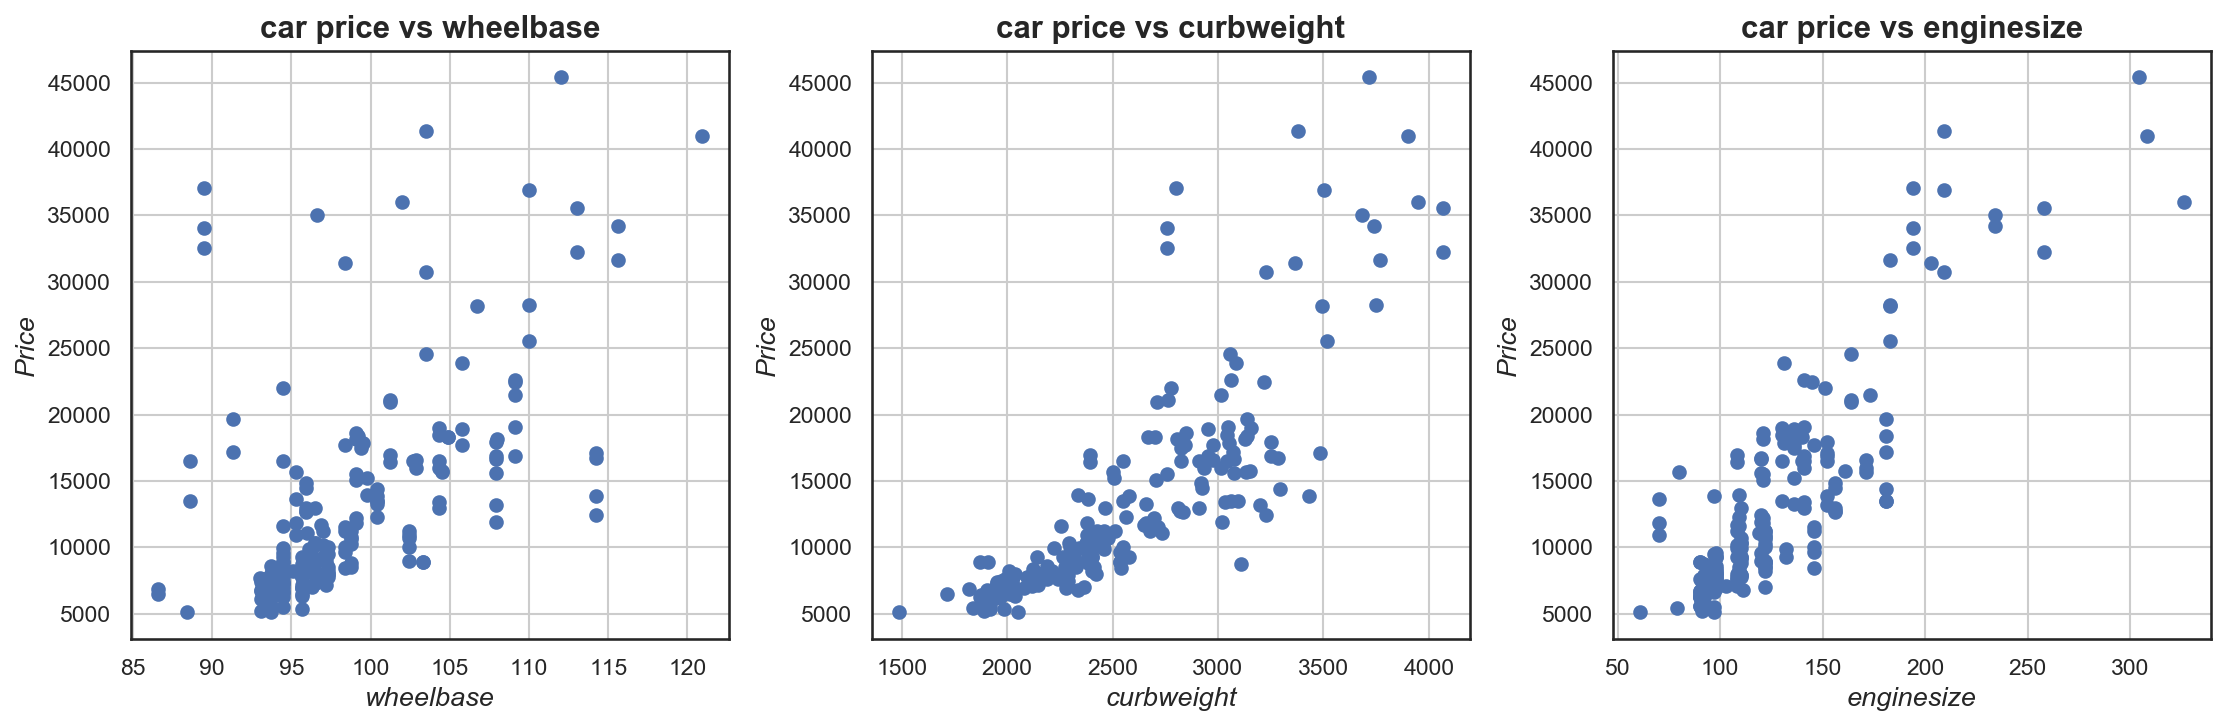

In [42]:
scatter_plt_3('wheelbase','curbweight', 'enginesize')

**Observations:**<br>
(i)`curbweight`and `enginesize` seems to have a strong positive correlation with the car `price`.<br>(ii)`wheelbase` is also positively correlated to car `price`.

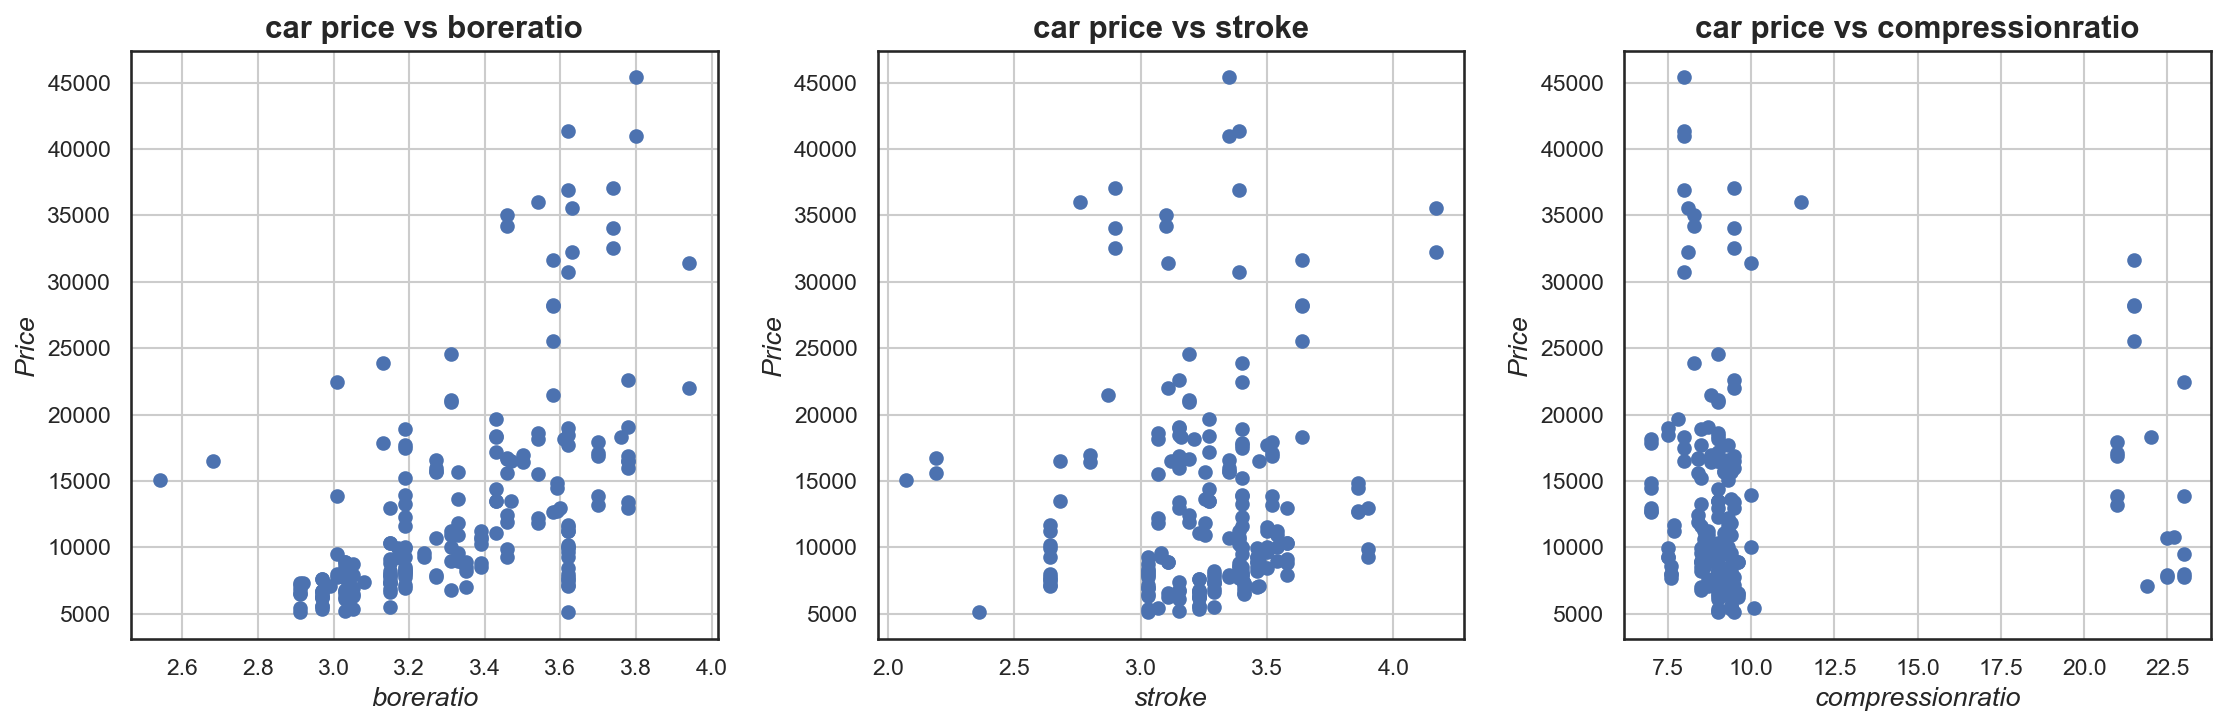

In [43]:
scatter_plt_3('boreratio', 'stroke', 'compressionratio')

**Observations:**<br>
(i)`stroke`and `compressionratio` seems to have very litte positive to no correlation with the car `price`.<br>(ii)`boreratio` has a moderately positive correlation w.r.t the car `price`.

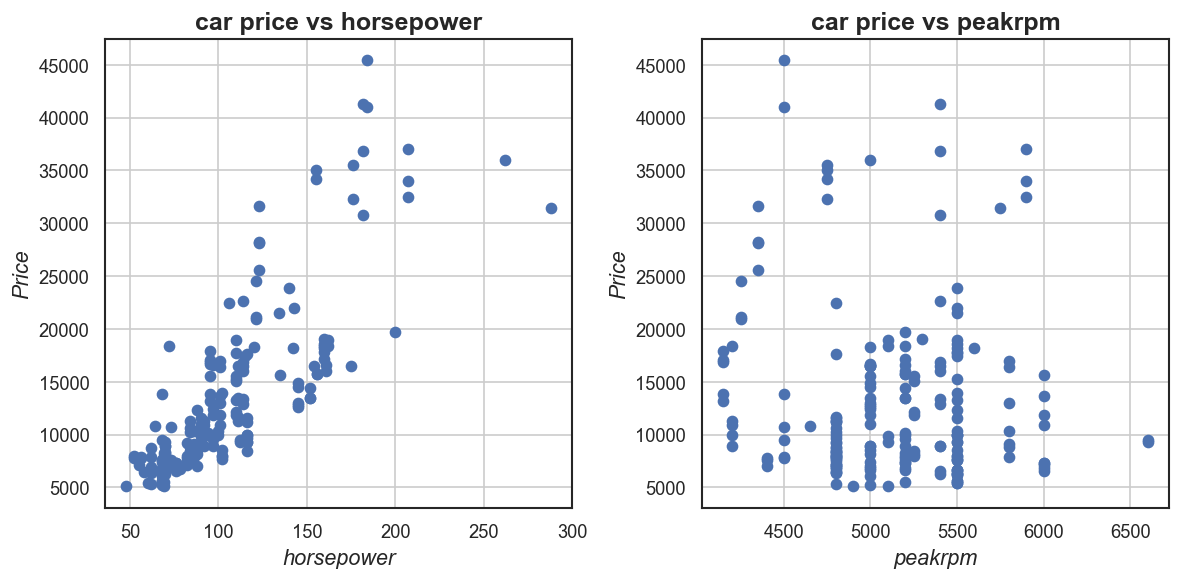

In [44]:
scatter_plt_2('horsepower', 'peakrpm')

**Observations:**<br>
(i)`horsepower` has a strong positive correlation w.r.t the car `price`.<br>
(ii) `peakrpm` has little negative to no correlation w.r.t the car `price`.

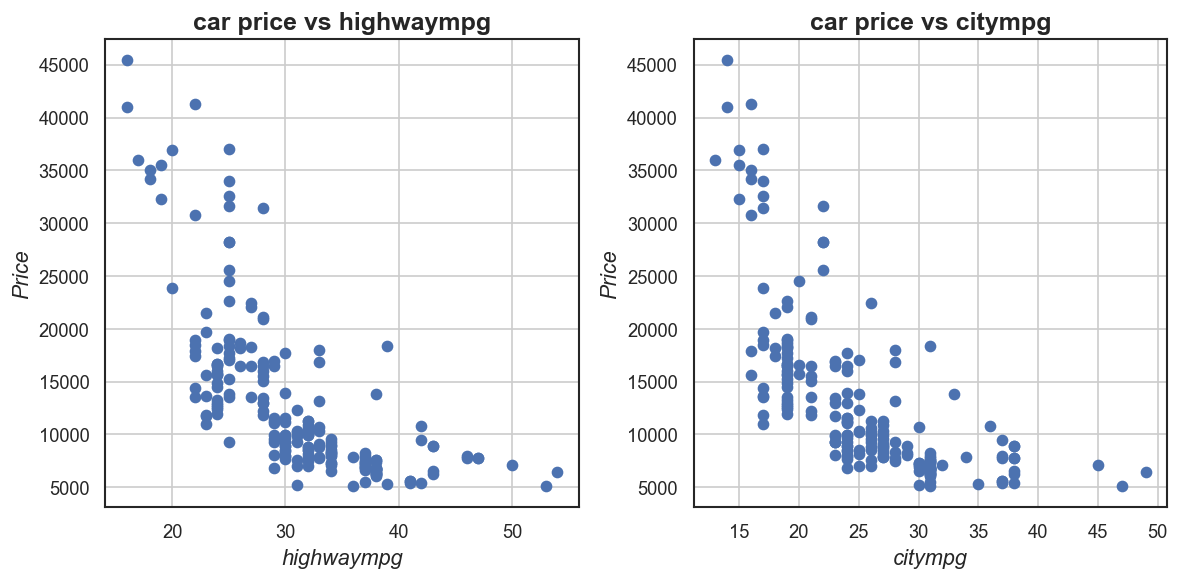

In [45]:
scatter_plt_2('highwaympg','citympg')

**Observation:**<br>
(i)`highwaympg` and `citympg` seems to have a significant negative correlation with the car `price`.

From the visualization of the entire data we see, some categories having minimum record count (of 1) which  can create a bias:<br>
Hence eliminating 'cylindernumber':'three', 'cylindernumber':'twelve', 'fuelsystem':'spfi',  'fuelsystem':'mfi', 'enginetype':'dohcv'

In [46]:
df_carprice = df_carprice.loc[~((df_carprice.cylindernumber=='three')|(df_carprice.cylindernumber=='twelve')|\
                               (df_carprice.fuelsystem=='spfi')|(df_carprice.fuelsystem=='mfi') |\
                               (df_carprice.enginetype=='dohcv'))]

### Step 4: Deriving New Features

#### 'price_range': Car Price Segment Analysis

In [47]:
##Creating an avg_carprice dataframe and deriving new segments of car 'price_range'
avg_carprice = df_carprice.groupby('companyname')['price'].mean().round(2).to_frame('avg_carprice')
avg_carprice.reset_index(inplace=True)

##Deriving new segments 'economical','midprice' and 'premium' based on average price of cars within a company
avg_carprice['price_range'] = ""
avg_carprice.loc[((avg_carprice.avg_carprice>0) & (avg_carprice.avg_carprice<10000)),['price_range']] ='economical' 
avg_carprice.loc[((avg_carprice.avg_carprice>=10000) & (avg_carprice.avg_carprice<20000)),['price_range']] ='midprice'
avg_carprice.loc[((avg_carprice.avg_carprice>=20000) & (avg_carprice.avg_carprice<=50000)),['price_range']] ='premium'
avg_carprice = avg_carprice.drop('avg_carprice',axis=1)
avg_carprice

##Merging 'df_carprice' and 'avg_carprice' to get the derived column 'price_range' and dropping off 'avg_carprice' column
df_carprice = pd.merge(df_carprice, avg_carprice, how='left', on='companyname')
df_carprice.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,price_range
0,1,high_risk,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,midprice
1,2,high_risk,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,midprice
2,3,low_risk,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,midprice
3,4,moderate_risk,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,midprice
4,5,moderate_risk,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,midprice


In [48]:
df_carprice.shape

(200, 27)

#### Average Car Price vs Type of Drivewheel Analysis

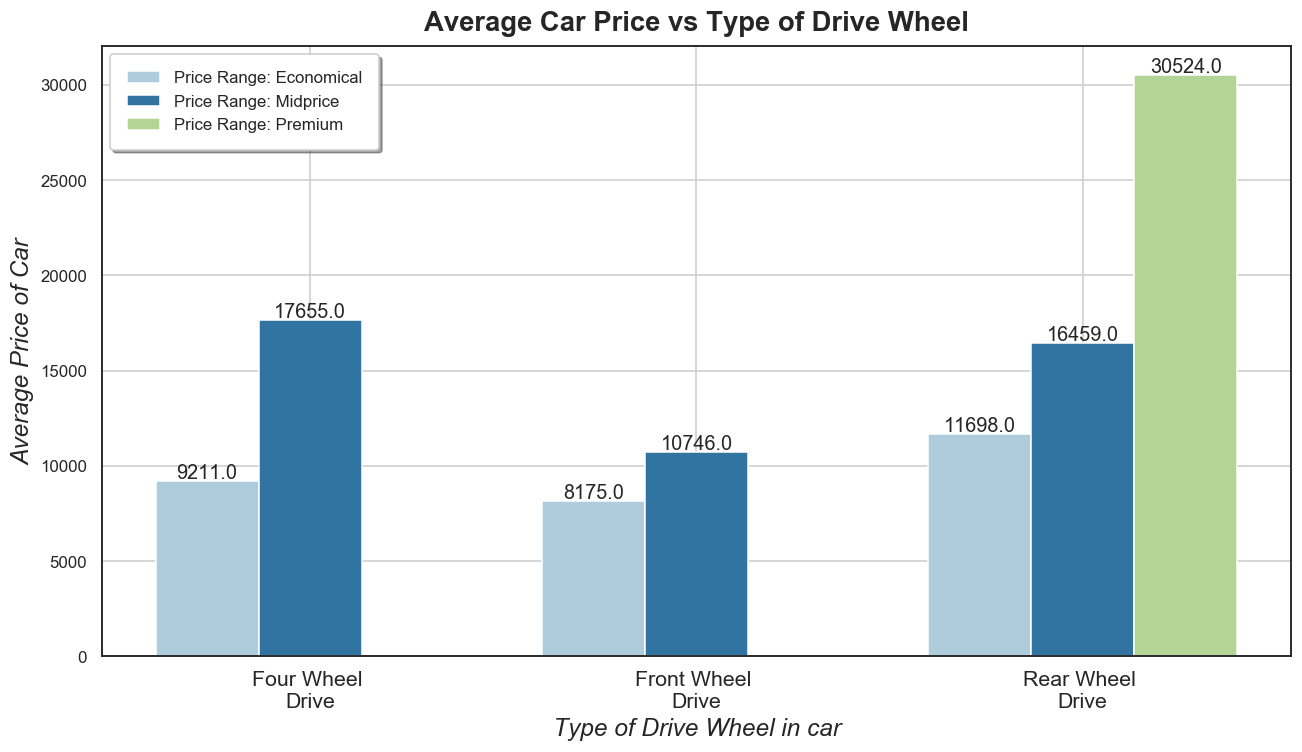

In [49]:
##Type of drivewheel in car and average car price (hue=price_range)
sns.set(style='white')
plt.figure(figsize=(12,7), dpi=110)
drv = df_carprice.groupby(['drivewheel','price_range'])['price'].mean().round(0).to_frame('avg_price')
drv.reset_index(inplace=True)

ax_E1 = sns.barplot(x=drv.drivewheel, y=drv.avg_price, hue=drv.price_range, palette='Paired')
plt.xlabel('Type of Drive Wheel in car', fontsize= 16, fontstyle='italic')
plt.xticks(range(0,3),['Four Wheel \nDrive','Front Wheel \nDrive','Rear Wheel \nDrive'], fontsize=14)
plt.ylabel('Average Price of Car', fontsize= 16, fontstyle='italic')
plt.title('Average Car Price vs Type of Drive Wheel',fontsize= 18, fontweight='bold', pad=10)

#Legend for the plot
M2= ax_E1.legend(loc='upper left', bbox_to_anchor=(0,1), framealpha=1, shadow=True, borderpad=1, fancybox=True)
M2.get_texts()[0].set_text('Price Range: Economical')
M2.get_texts()[1].set_text('Price Range: Midprice')
M2.get_texts()[2].set_text('Price Range: Premium')


#Display values
for i in ax_E1.patches:
    ax_E1.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2.,\
                                                i.get_height()), ha = 'center', fontsize=13, \
                   va = 'center', xytext = (0,5), textcoords = 'offset points', rotation=0)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:**
The `'premium'` range cars prefer `rwd (rear wheel drive)`

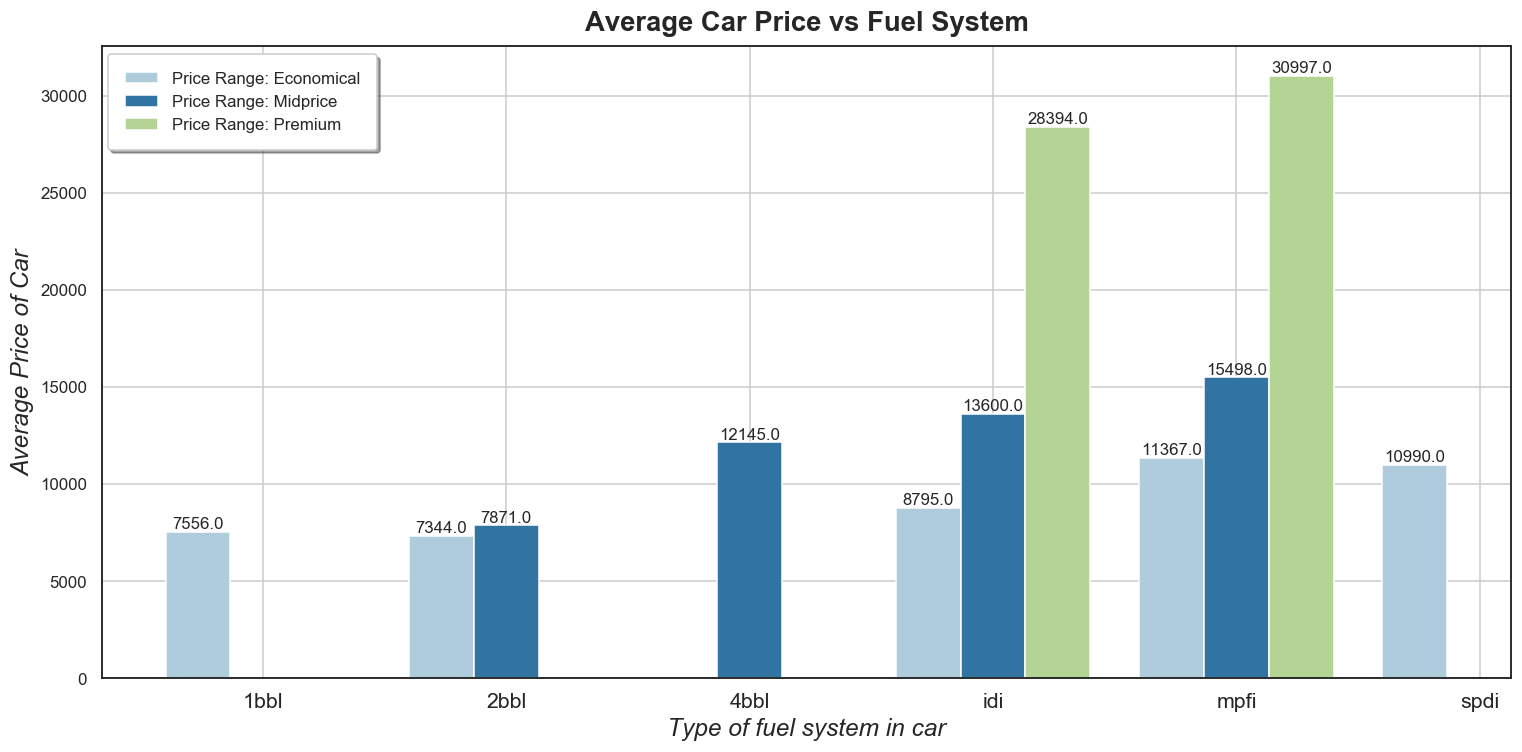

In [50]:
##Type of fuel system and average car price (hue='price_range')
sns.set(style='white')
plt.figure(figsize=(14,7), dpi=110)
fuel = df_carprice.groupby(['fuelsystem','price_range'])['price'].mean().round(0).to_frame('avg_price')
fuel.reset_index(inplace=True)

ax_F1 = sns.barplot(x=fuel.fuelsystem, y=fuel.avg_price, hue=fuel.price_range, palette='Paired')
plt.xlabel('Type of fuel system in car', fontsize= 16, fontstyle='italic')
plt.xticks(fontsize=14)
plt.ylabel('Average Price of Car', fontsize= 16, fontstyle='italic')
plt.title('Average Car Price vs Fuel System',fontsize= 18, fontweight='bold', pad=10)

#Legend for the plot
M1= ax_F1.legend(loc='upper center', bbox_to_anchor=(0.1,1), framealpha=1, shadow=True, borderpad=1, fancybox=True)
M1.get_texts()[0].set_text('Price Range: Economical')
M1.get_texts()[1].set_text('Price Range: Midprice')
M1.get_texts()[2].set_text('Price Range: Premium')


#Display values
for i in ax_F1.patches:
    ax_F1.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2.,\
                                                i.get_height()), ha = 'center', fontsize=11, \
                   va = 'center', xytext = (0,5), textcoords = 'offset points', rotation=0)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:**
The`'premium'` range cars prefer `idi` and `mpfi` fuel system. 

In [51]:
##Checking the numeric dtypes (float64 and int64)
df_carprice.select_dtypes(include=['float64','int64']).columns

Index(['car_id', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [52]:
##Checking the object dtypes (object)
df_carprice.select_dtypes(include=['object']).columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'companyname', 'price_range'],
      dtype='object')

On visualising the data, we consider only the following variables that affect our dependent variable, price. <br>(i) Also, we drop the uniqueID as it has all the unique values.<br>(ii) Moreover, 'stroke', 'compressionratio', 'carheight' and 'peakrpm' are dropped too, as they have little to no correlation with 'carprice'.<br>

In [53]:
##Creating a dataframe for linear regression model (variables to be taken into account)
carprice = df_carprice.loc[:,['price','carlength', 'carwidth','curbweight', 'enginesize','wheelbase','horsepower','citympg',\
            'highwaympg','boreratio', 'symboling', 'enginetype','fuelsystem', 'cylindernumber','drivewheel',\
            'enginelocation', 'doornumber','aspiration','fueltype','carbody','price_range']]

In [54]:
carprice.head()

,price,carlength,carwidth,curbweight,enginesize,wheelbase,horsepower,citympg,highwaympg,boreratio,symboling,enginetype,fuelsystem,cylindernumber,drivewheel,enginelocation,doornumber,aspiration,fueltype,carbody,price_range
0,13495.0,168.8,64.1,2548,130,88.6,111,21,27,3.47,high_risk,dohc,mpfi,four,rwd,front,two,std,gas,convertible,midprice
1,16500.0,168.8,64.1,2548,130,88.6,111,21,27,3.47,high_risk,dohc,mpfi,four,rwd,front,two,std,gas,convertible,midprice
2,16500.0,171.2,65.5,2823,152,94.5,154,19,26,2.68,low_risk,ohcv,mpfi,six,rwd,front,two,std,gas,hatchback,midprice
3,13950.0,176.6,66.2,2337,109,99.8,102,24,30,3.19,moderate_risk,ohc,mpfi,four,fwd,front,four,std,gas,sedan,midprice
4,17450.0,176.6,66.4,2824,136,99.4,115,18,22,3.19,moderate_risk,ohc,mpfi,five,4wd,front,four,std,gas,sedan,midprice


In [55]:
carprice.shape

(200, 21)

In [56]:
##numeric variables
numeric_vars = carprice.select_dtypes(include=['int64','float64']).columns
numeric_vars

Index(['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'wheelbase', 'horsepower', 'citympg', 'highwaympg', 'boreratio'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

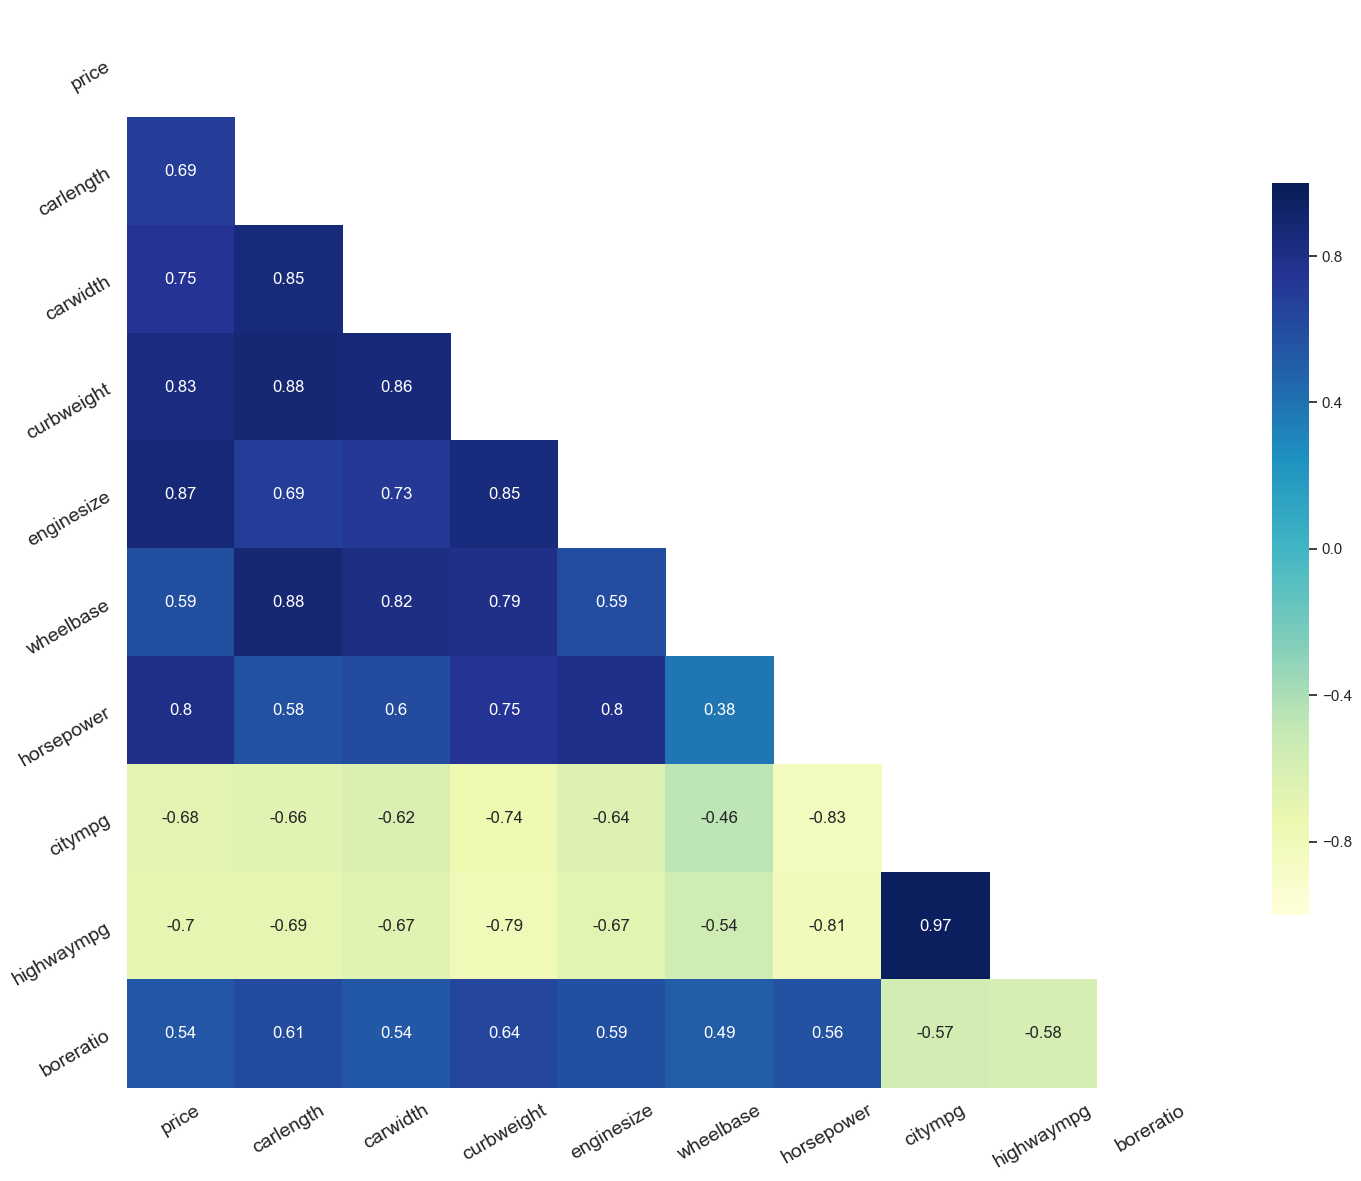

In [57]:
#Plotting a heatmap to understand correlation amongst continuous/numeric variables

plt.figure(figsize = (12,8), dpi=100)
corr_matrix_new = carprice[numeric_vars].corr()
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_1, annot=True)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=30)
plt.tight_layout()
plt.autoscale()
plt.show()

In [58]:
##categorical variables
cat_vars = carprice.select_dtypes(include=['object']).columns
cat_vars

Index(['symboling', 'enginetype', 'fuelsystem', 'cylindernumber', 'drivewheel',
       'enginelocation', 'doornumber', 'aspiration', 'fueltype', 'carbody',
       'price_range'],
      dtype='object')

### Step 5: Dummy Variables

In [59]:
##Defining a function for categorical variables with binary values.
def binary_cat_vars(df, list_new):
    df1 = df.copy()
    for i in list_new:
        if len(set(df1[i]))==2:
            print('Categorical variable with binary values: ',i,'\nUnique Values in ',i,':',set(df[i]),"\n")

cat_list_new = list(cat_vars)
binary_cat_vars(df=carprice, list_new= cat_list_new)

Categorical variable with binary values:  enginelocation 
Unique Values in  enginelocation : {'front', 'rear'} 

Categorical variable with binary values:  doornumber 
Unique Values in  doornumber : {'two', 'four'} 

Categorical variable with binary values:  aspiration 
Unique Values in  aspiration : {'turbo', 'std'} 

Categorical variable with binary values:  fueltype 
Unique Values in  fueltype : {'gas', 'diesel'} 



In [60]:
##Mapping binary values, '0' and '1' to the binary category variables
carprice['enginelocation'] = carprice['enginelocation'].map({'rear': 1, 'front': 0})
carprice['doornumber'] = carprice['doornumber'].map({'four': 1, 'two': 0})
carprice['aspiration'] = carprice['aspiration'].map({'std': 1, 'turbo': 0})
carprice['fueltype'] = carprice['fueltype'].map({'gas': 1, 'diesel': 0})

In [61]:
len(carprice.columns)

21

In [62]:
carprice.columns

Index(['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'wheelbase', 'horsepower', 'citympg', 'highwaympg', 'boreratio',
       'symboling', 'enginetype', 'fuelsystem', 'cylindernumber', 'drivewheel',
       'enginelocation', 'doornumber', 'aspiration', 'fueltype', 'carbody',
       'price_range'],
      dtype='object')

In [63]:
##Using get_dummies for other categorical variables. 'carp' is the new dataframe with all the variables including dummy variables.

carp = pd.get_dummies(carprice, drop_first=True) #drop_first
carp.head()

,price,carlength,carwidth,curbweight,enginesize,wheelbase,horsepower,citympg,highwaympg,boreratio,enginelocation,doornumber,aspiration,fueltype,symboling_low_risk,symboling_moderate_risk,symboling_moderate_safe,symboling_neutral,symboling_very_safe,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_range_midprice,price_range_premium
0,13495.0,168.8,64.1,2548,130,88.6,111,21,27,3.47,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,16500.0,168.8,64.1,2548,130,88.6,111,21,27,3.47,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,16500.0,171.2,65.5,2823,152,94.5,154,19,26,2.68,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,13950.0,176.6,66.2,2337,109,99.8,102,24,30,3.19,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,17450.0,176.6,66.4,2824,136,99.4,115,18,22,3.19,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0


In [64]:
carp.shape

(200, 41)

In [65]:
#checking column names for dummy variables
carp.columns

Index(['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'wheelbase', 'horsepower', 'citympg', 'highwaympg', 'boreratio',
       'enginelocation', 'doornumber', 'aspiration', 'fueltype',
       'symboling_low_risk', 'symboling_moderate_risk',
       'symboling_moderate_safe', 'symboling_neutral', 'symboling_very_safe',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'price_range_midprice', 'price_range_premium'],
      dtype='object')

## Step 6: Splitting the Data into Train and Test sets

In [66]:
##Train and Test set split. 
np.random.seed(0)
carp_train, carp_test = train_test_split(carp, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling The Features

In [67]:
##MinMaxScaler
scaler = MinMaxScaler()

In [68]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',\
            'wheelbase', 'horsepower', 'citympg', 'highwaympg', 'boreratio']

#scaler fit_transform on train data
carp_train[num_vars] = scaler.fit_transform(carp_train[num_vars])
carp_train.head()

,price,carlength,carwidth,curbweight,enginesize,wheelbase,horsepower,citympg,highwaympg,boreratio,enginelocation,doornumber,aspiration,fueltype,symboling_low_risk,symboling_moderate_risk,symboling_moderate_safe,symboling_neutral,symboling_very_safe,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_range_midprice,price_range_premium
74,0.032982,0.138783,0.200000,0.074921,0.094017,0.188889,0.103226,0.548387,0.647059,0.307143,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0.214771,0.505703,0.389474,0.224316,0.166667,0.414815,0.322581,0.322581,0.411765,0.464286,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
185,0.115650,0.298479,0.157895,0.172275,0.166667,0.218519,0.245161,0.322581,0.382353,0.464286,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
26,0.080146,0.138783,0.136842,0.158816,0.119658,0.188889,0.322581,0.322581,0.411765,0.350000,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
90,0.048712,0.290875,0.136842,0.051144,0.115385,0.218519,0.109677,0.548387,0.617647,0.435714,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


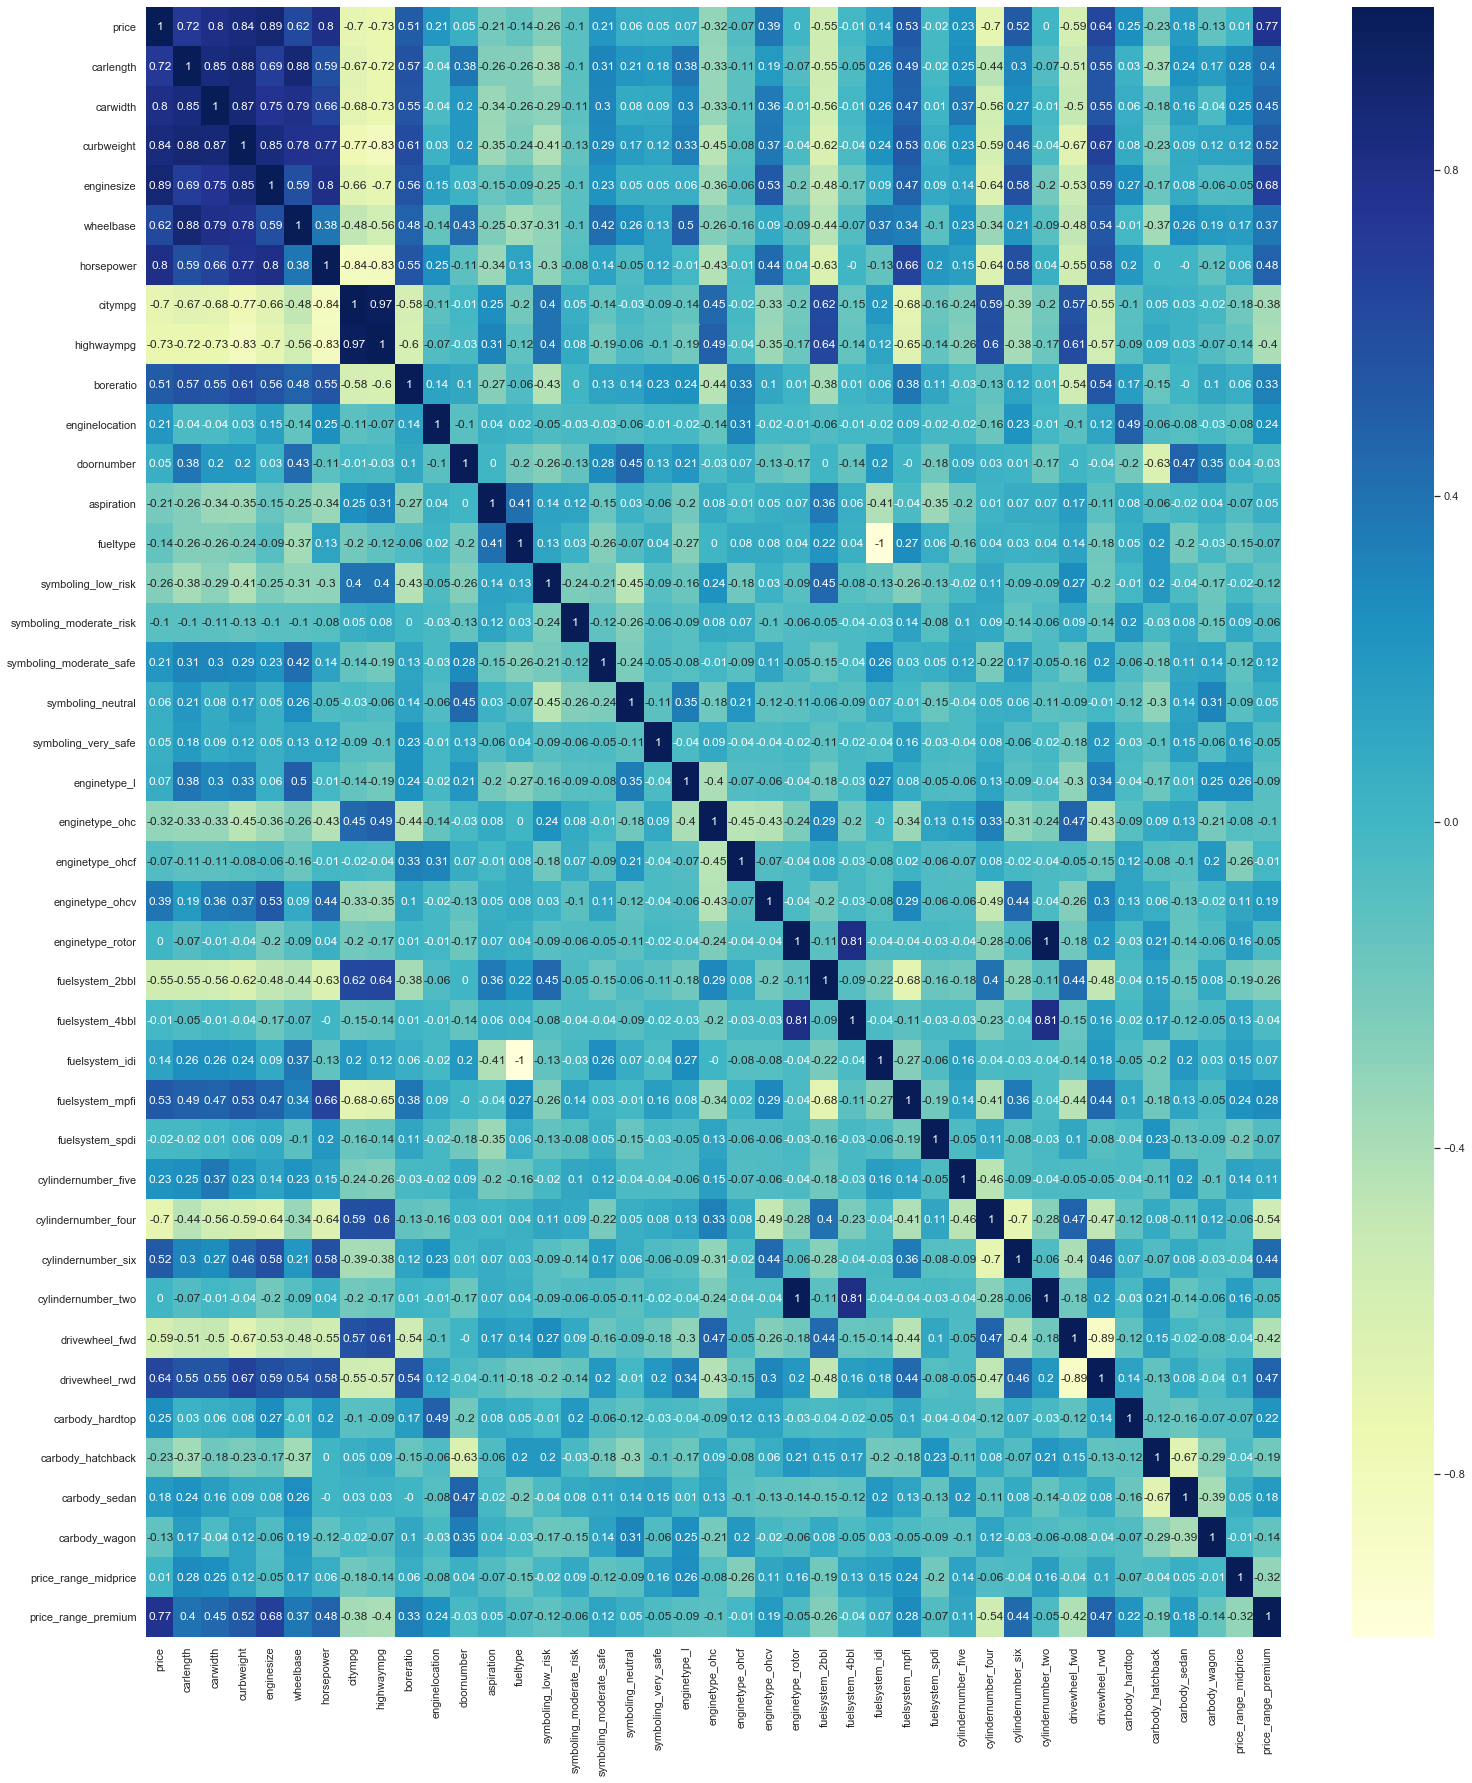

In [69]:
#Correlation using heatmap
plt.figure(figsize = (22, 25))
sns.heatmap(round(carp_train.corr(),2), annot = True, cmap="YlGnBu")
plt.tight_layout()
plt.autoscale()
plt.show()

### Dividing into X and y sets for the model building

In [70]:
##Dividing into X_train and y_train sets where y contains the dependent variable
y_train = carp_train.pop('price')
X_train = carp_train

## Step 7: Building our model (using RFE)

Here, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [71]:
##Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 18),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('wheelbase', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 20),
 ('highwaympg', False, 16),
 ('boreratio', False, 14),
 ('enginelocation', True, 1),
 ('doornumber', False, 28),
 ('aspiration', False, 31),
 ('fueltype', False, 9),
 ('symboling_low_risk', False, 25),
 ('symboling_moderate_risk', False, 21),
 ('symboling_moderate_safe', False, 3),
 ('symboling_neutral', False, 24),
 ('symboling_very_safe', False, 4),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 11),
 ('enginetype_ohcf', False, 12),
 ('enginetype_ohcv', False, 17),
 ('enginetype_rotor', False, 15),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False, 29),
 ('fuelsystem_idi', False, 23),
 ('fuelsystem_mpfi', False, 30),
 ('fuelsystem_spdi', False, 10),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_two', True, 1),
 (

In [73]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['carwidth', 'curbweight', 'wheelbase', 'horsepower', 'enginelocation',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'price_range_premium'],
      dtype='object')

### Model Building: using statsmodel (for the detailed statistics)

In [74]:
##Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col_rfe_sup]

For our model, we consider the significance level of 5% and VIF(<5) to have little to no multicollinearity.

In [75]:
##Defining a function for creating models
def build_model(y,X):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # Fitting the model
    print(lm.summary()) # Model summary
    return X

In [76]:
##Defining a function for VIFs (variation inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def mod_vif(X_train_set):
    car_vif = pd.DataFrame()
    X = X_train_set
    car_vif['Features'] = X.columns
    car_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    car_vif['VIF'] = round(car_vif['VIF'], 2)
    car_vif = car_vif.sort_values(by = "VIF", ascending = False)
    car_vif = car_vif[~(car_vif.Features=='const')] #Ignore the constant from the display
    return car_vif

#### Model 1:

In [77]:
##Building Model 1: 
X_train_rfe = build_model(y_train, X_train_rfe)

##Checking VIFs of independent variables
mod_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.17e-67
Time:                        23:36:02   Log-Likelihood:                 212.56
No. Observations:                 140   AIC:                            -403.1
Df Residuals:                     129   BIC:                            -370.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1336    

,Features,VIF
7,cylindernumber_four,14.27
2,curbweight,9.11
8,cylindernumber_six,7.69
1,carwidth,6.84
3,wheelbase,4.87
4,horsepower,4.60
6,cylindernumber_five,4.23
9,cylindernumber_two,2.59
10,price_range_premium,1.93
5,enginelocation,1.25


**Observations (Model 1):**<br>(i) From the statistics summary, we see that `curbweight` has a high p-value(>0.05) as well as it exhibits multicollinearity(VIF>5). Hence, dropping off `curbweight` predictor variable.

In [78]:
#Eliminating 'curbweight`
X_train_new = X_train_rfe.drop('curbweight', axis=1)

#### Model 2

In [79]:
##Building Model 2: 
X_train_new = build_model(y_train, X_train_new)

##Checking VIFs of independent variables
mod_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     171.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.04e-67
Time:                        23:36:02   Log-Likelihood:                 211.24
No. Observations:                 140   AIC:                            -402.5
Df Residuals:                     130   BIC:                            -373.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1312    

,Features,VIF
6,cylindernumber_four,14.21
7,cylindernumber_six,7.69
1,carwidth,6.26
5,cylindernumber_five,4.20
2,wheelbase,3.44
3,horsepower,3.15
8,cylindernumber_two,2.57
9,price_range_premium,1.92
4,enginelocation,1.24


**Observations (Model 2):**<br>(i) From the statistics summary, we see p-values are within acceptable range(<0.05) and predictor`cylindernumber_four` has a high VIF(>5). Hence, dropping off `cylindernumber_four`.

In [80]:
#Eliminating 'cylindernumber_four'
X_train_new = X_train_new.drop('cylindernumber_four', axis=1)

#### Model 3

In [81]:
##Building Model 3: 
X_train_new = build_model(y_train, X_train_new)

##Checking VIFs of independent variables
mod_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     170.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.62e-65
Time:                        23:36:02   Log-Likelihood:                 202.44
No. Observations:                 140   AIC:                            -386.9
Df Residuals:                     131   BIC:                            -360.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0542    

,Features,VIF
1,carwidth,5.56
2,wheelbase,3.25
3,horsepower,3.15
6,cylindernumber_six,1.76
8,price_range_premium,1.54
5,cylindernumber_five,1.25
4,enginelocation,1.23
7,cylindernumber_two,1.03


**Observations (Model 3):**<br>(i) From the statistics summary, we see that `cylindernumber_five` has high p-value(>0.05). So dropping off insignificant predictor, `cylindernumber_five`.

In [82]:
#Eliminating 'cylindernumber_five'
X_train_new = X_train_new.drop('cylindernumber_five', axis=1)

#### Model 4

In [83]:
##Building Model 4: 
X_train_new = build_model(y_train, X_train_new)

##Checking VIFs of independent variables
mod_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.82e-66
Time:                        23:36:02   Log-Likelihood:                 202.43
No. Observations:                 140   AIC:                            -388.9
Df Residuals:                     132   BIC:                            -365.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0540    

,Features,VIF
1,carwidth,4.98
2,wheelbase,3.18
3,horsepower,3.13
5,cylindernumber_six,1.72
7,price_range_premium,1.54
4,enginelocation,1.23
6,cylindernumber_two,1.03


**Observations (Model 4):**<br>(i) From the statistics summary, we see that `cylindernumber_two` has high p-value(>0.05). So dropping off insignificant predictor, `cylindernumber_two`.

In [84]:
#Eliminating 'cylindernumber_two'
X_train_new = X_train_new.drop('cylindernumber_two', axis=1)

#### Model 5:

In [85]:
##Building Model 5: 
X_train_new = build_model(y_train, X_train_new)

##Checking VIFs of independent variables
mod_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     228.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.93e-67
Time:                        23:36:02   Log-Likelihood:                 201.87
No. Observations:                 140   AIC:                            -389.7
Df Residuals:                     133   BIC:                            -369.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0531    

,Features,VIF
1,carwidth,4.97
2,wheelbase,3.15
3,horsepower,3.11
5,cylindernumber_six,1.71
6,price_range_premium,1.54
4,enginelocation,1.23


**Observations (Model 5):**<br>(i) From the statistics summary, we see that `cylindernumber_six` has high p-value(>0.05). So dropping off insignificant predictor, `cylindernumber_six`.

In [86]:
#Eliminating 'cylindernumber_six'
X_train_new = X_train_new.drop('cylindernumber_six', axis=1)

#### Model 6 

In [87]:
##Building Model 6: 
X_train_new = build_model(y_train, X_train_new)

##Checking VIFs of independent variables
mod_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.81e-68
Time:                        23:36:02   Log-Likelihood:                 201.36
No. Observations:                 140   AIC:                            -390.7
Df Residuals:                     134   BIC:                            -373.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0552    

,Features,VIF
1,carwidth,4.62
2,wheelbase,3.06
3,horsepower,2.33
5,price_range_premium,1.46
4,enginelocation,1.23


**Observations (Model 5):**<br>(i) From the statistics summary, we see that `enginelocation` has high p-value(>0.05). So dropping off insignificant predictor, `enginelocation`.

In [88]:
#Eliminating 'enginelocation'
X_train_new = X_train_new.drop('enginelocation', axis=1)

#### Model 7

In [89]:
##Building Model 7: 
X_train_new = build_model(y_train, X_train_new)

##Checking VIFs of independent variables
mod_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     336.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.69e-69
Time:                        23:36:02   Log-Likelihood:                 199.91
No. Observations:                 140   AIC:                            -389.8
Df Residuals:                     135   BIC:                            -375.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0535    

,Features,VIF
1,carwidth,4.53
2,wheelbase,3.03
3,horsepower,2.16
4,price_range_premium,1.38


**Observations:** <br>(1) `R-sqaured` and `Adjusted R-squared` (extent of fit) - `0.909` and `0.906` - almost `90%` variance explained.<br>(2) `Overall fit`: (i) `F-stats:336.7` and (ii) `prob(F_statistic): 3.69e-69`. Since the prob(F-statistics) is approx. 0.0, Therefore an excellent `overall model fit` and it is `not by chance`.<br>(3) `p-values` - p-values for all the regression coefficients are less than the significance level of 0.05. Thus, all the `predictor variables` are `statistically significant`.

We can see that the equation of our best fitted line is:

*price* = 0.2481(*carwidth*) + 0.08792(*wheelbase*) + 0.3089(*horsepower*) + 0.2665(*price_range_premium*) - 0.0535 


### Step 8: Residual Analysis of Model

Checking for the error terms distribution. They should be normally distributed (as it is one of the major assumptions of linear regression).

In [90]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

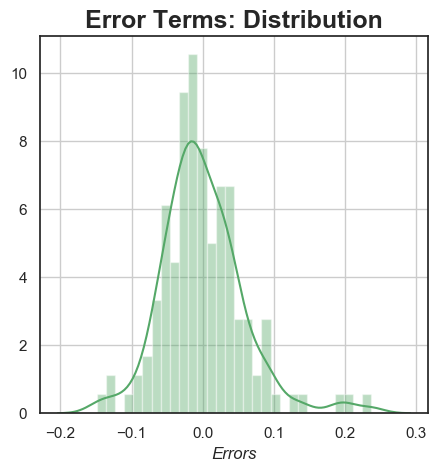

In [91]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_train_pred)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

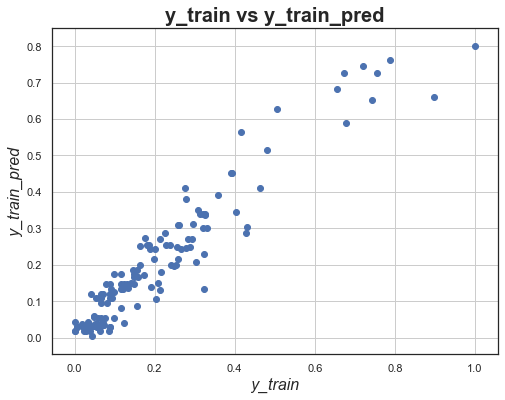

In [92]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_train_pred)
plt.title('y_train vs y_train_pred', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_train_pred', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [93]:
y_train.shape

(140,)

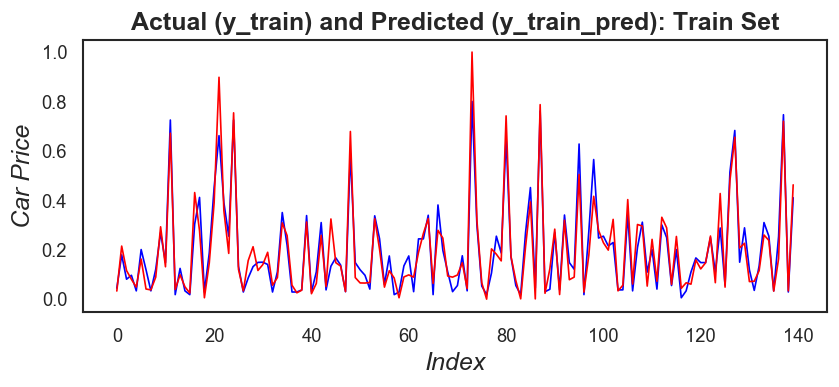

In [94]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (8,3), dpi=120)
f = [i for i in range(0,140,1)] #Since y_train has 140 observations
g = [i for i in range(0,140,1)]
plt.plot(f, y_train_pred, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_train_pred' plot
plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_train_pred): Train Set", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('Car Price', fontsize=15, fontstyle='italic')  
plt.show()

<b><font color=Blue>Blue: Predicted (y_train_pred)</font></b><b><b>- - - - - - - - - - - - - -</b><font color=Red>  Red: Actual (y_train)</font></b>

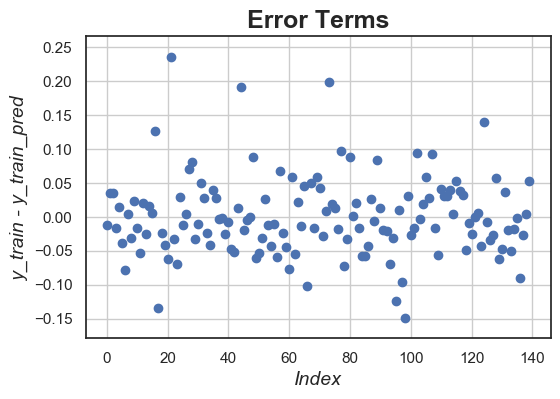

In [95]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,140,1)] #For 140 observations in the train set
res_train = (y_train-y_train_pred) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_train_pred', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

## Step 9: Prediction and Evaluation

#### Applying scaling on test sets

In [96]:
#Scaling the test set
num_vars = ['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',\
            'wheelbase', 'horsepower', 'citympg', 'highwaympg', 'boreratio']

#scaler transform on test data set
carp_test[num_vars] = scaler.transform(carp_test[num_vars])
carp_test.head()

,price,carlength,carwidth,curbweight,enginesize,wheelbase,horsepower,citympg,highwaympg,boreratio,enginelocation,doornumber,aspiration,fueltype,symboling_low_risk,symboling_moderate_risk,symboling_moderate_safe,symboling_neutral,symboling_very_safe,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,price_range_midprice,price_range_premium
126,0.113527,0.509506,0.431579,0.279498,0.264957,0.277778,0.245161,0.290323,0.441176,0.657143,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
104,0.196045,0.697719,0.621053,0.610139,0.350427,0.714815,0.277419,0.451613,0.500000,0.828571,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
99,0.203510,0.657795,0.421053,0.548677,0.474359,0.437037,0.645161,0.161290,0.264706,0.635714,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
92,0.053705,0.290875,0.136842,0.060117,0.115385,0.218519,0.109677,0.548387,0.617647,0.435714,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
111,0.281684,0.697719,0.621053,0.555406,0.213675,0.714815,0.290323,0.161290,0.235294,0.657143,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0


#### Dividing into X_test and y_test

In [97]:
y_test = carp_test.pop('price')
X_test = carp_test

#### Making Predictions

In [98]:
#Retaining the 'const' in the X_train_new set. Creating a new df X_train_new1 and dropping off 'const'
X_train_new1 = X_train_new
X_train_new1.drop('const', axis=1, inplace=True)

# Creating 'X_test_new' dataframe, considering the columns from X_train_new1 (note: 'const' is dropped)
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [99]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

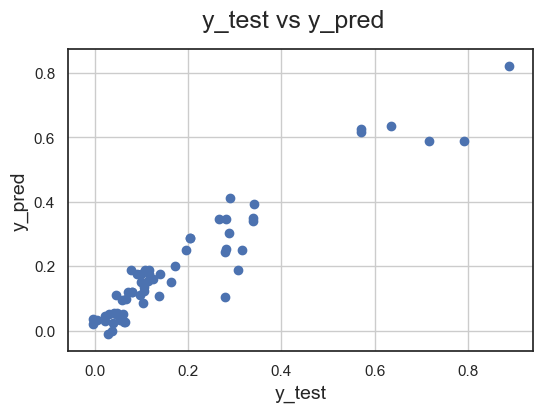

In [100]:
# Plotting y_test and y_test_pred to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred', fontsize=14)  
plt.grid(True)
plt.show()

In [101]:
y_test.shape

(60,)

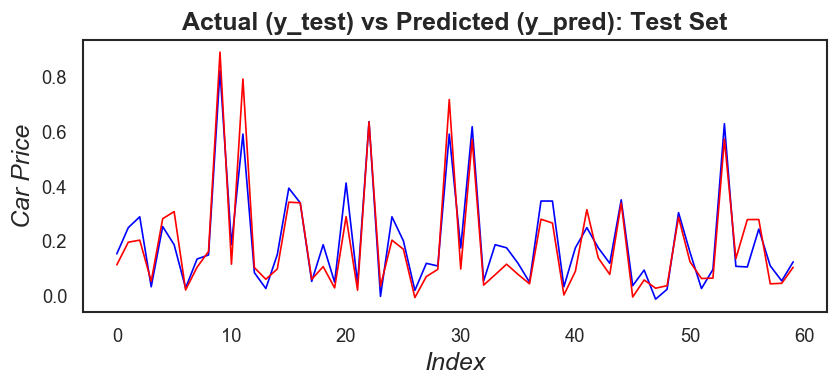

In [102]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (8,3), dpi=120)
p = [i for i in range(0,60,1)] #As test set has 60 observations
l = [i for i in range(0,60,1)]
plt.plot(p, y_pred, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('Car Price', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

<b><font color=Blue>Blue: Predicted (y_pred)</font></b><b><b>- - - - - - - - - - - - - -</b><font color=Red>  Red: Actual (y_test)</font></b>

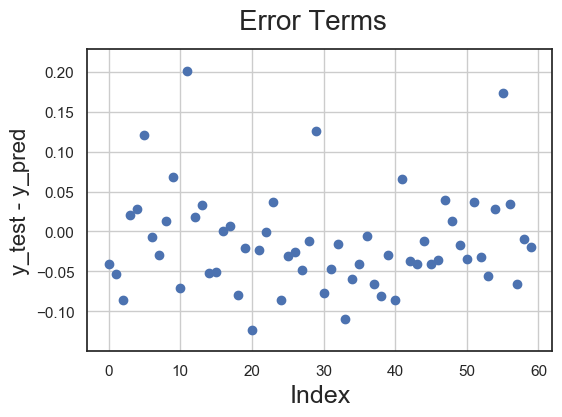

In [103]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,60,1)] #For 60 observations in the test set
res_test = (y_test-y_pred) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

### RMSE Scores

In [104]:
#RMSE score for train set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

RMSE : 0.05802720771618749


In [105]:
#RMSE score for test set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06280620065117143


### R squared (R2 Scores)

In [106]:
#R2 score for train set
from sklearn.metrics import r2_score 
r2_score(y_true= y_train, y_pred= y_train_pred)

0.9088838565948554

The `R-squared` score on the `train set` is `0.9088838565948554` i.e. meaning approx. `90.88%` of the variance for 'price' is explained by the independent variables in the `train set`.

**Inference (Final Model: Model 7)**<br>(1) `R-sqaured` and `Adjusted R-squared` (extent of fit) - `0.909` and `0.906` - almost `90%` variance explained.<br>(2) `Overall fit`: (i) `F-stats:336.7` and (ii) `prob(F_statistic): 3.69e-69`. Since the prob(F-statistics) is approx. 0.0, Therefore an excellent `overall model fit` and it is `not by chance`.<br>(3) `p-values` - p-values for all the regression coefficients are less than the significance level of 0.05. Thus, all the `predictor variables` are `statistically significant`.

In [107]:
#Calculating the R-squared score on the test set
from sklearn.metrics import r2_score 
r2_score(y_true= y_test, y_pred= y_pred)

0.8999367891566707

Here, y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

**Inference:**<br>The `R-squared` score on the `test set` is `0.8999367891566707` i.e. meaning approx. `89.99%` of the variance for 'price' is explained by the independent variables in the `test set`.